# Logistic Regression Using Food Items Dataset

In [2]:
#!pip install -U scikit-learn imbalanced-learn --quiet


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv(r"/kaggle/input/food-items-dataset/food_items.csv")
data.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


### Data Exploration

In [5]:
data.shape

(13260, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             13260 non-null  float64
 1   Total Fat            13260 non-null  int64  
 2   Saturated Fat        13260 non-null  float64
 3   Monounsaturated Fat  13260 non-null  float64
 4   Polyunsaturated Fat  13260 non-null  float64
 5   Trans Fat            13260 non-null  float64
 6   Cholesterol          13260 non-null  int64  
 7   Sodium               13260 non-null  float64
 8   Total Carbohydrate   13260 non-null  float64
 9   Dietary Fiber        13260 non-null  float64
 10  Sugars               13260 non-null  float64
 11  Sugar Alcohol        13260 non-null  int64  
 12  Protein              13260 non-null  float64
 13  Vitamin A            13260 non-null  int64  
 14  Vitamin C            13260 non-null  int64  
 15  Calcium              13260 non-null 

In [7]:
data.isnull().sum()

Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
class                  0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(2341)

In [9]:
food_df = data.copy()

In [10]:
feature_cols = list(food_df.iloc[:, :-1].columns)
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [11]:
food_df.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


The objective of this project is to build a machine learning classification model that can predict the category of a food item based on its nutritional values.

This is a multiclass classification problem, where the model needs to distinguish between several categories using numerical features

In [12]:
food_df[food_df.duplicated()]

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
27,157.0,0,0.0,0.0,0.0,0.0,0,10.0,11.2,0.0,0.0,0,1.2,0,0,0,0,'Less Often'
44,222.0,0,0.0,0.0,0.0,0.0,0,14.0,16.0,0.0,0.0,0,1.7,0,0,0,0,'Less Often'
46,160.0,0,0.0,0.0,0.0,0.0,0,10.0,11.0,0.0,0.0,0,1.2,0,0,0,0,'Less Often'
53,1.0,0,0.0,0.0,0.0,0.0,0,24.0,0.0,0.0,0.0,0,0.0,0,0,0,0,'More Often'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,290.0,5,2.0,0.0,0.0,0.0,10,560.0,50.0,8.0,5.0,0,13.0,8,20,15,20,'In Moderation'
13230,210.0,14,2.0,6.0,8.0,0.0,0,10.0,16.0,3.0,7.0,0,7.0,0,4,6,8,'Less Often'
13245,90.0,2,0.5,0.0,0.0,0.0,0,70.0,17.0,1.0,8.0,0,2.0,0,0,0,2,'In Moderation'
13246,90.0,2,0.5,0.0,0.0,0.0,0,70.0,17.0,1.0,8.0,0,2.0,0,0,0,2,'In Moderation'


In [13]:
food_df[food_df['Calories'] == 110]

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
11,110.0,0,0.0,0.0,0.0,0.0,0,0.0,6.6,0.0,0.0,0,0.9,0,0,0,0,'In Moderation'
13,110.0,0,0.0,0.0,0.0,0.0,0,0.0,6.5,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
567,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.3,0.0,0.0,0,0.9,0,0,0,0,'In Moderation'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13208,110.0,5,0.5,0.0,0.0,0.0,0,250.0,13.0,5.0,2.0,0,6.0,50,6,4,14,'Less Often'
13210,110.0,5,0.0,0.0,0.0,0.0,0,135.0,14.0,4.0,1.0,0,5.0,0,0,6,8,'Less Often'
13212,110.0,5,0.5,0.0,0.0,0.0,0,250.0,13.0,5.0,2.0,0,6.0,50,6,4,14,'Less Often'
13225,110.0,5,0.0,0.0,0.0,0.0,0,340.0,16.0,1.0,2.0,0,2.0,15,0,2,0,'Less Often'


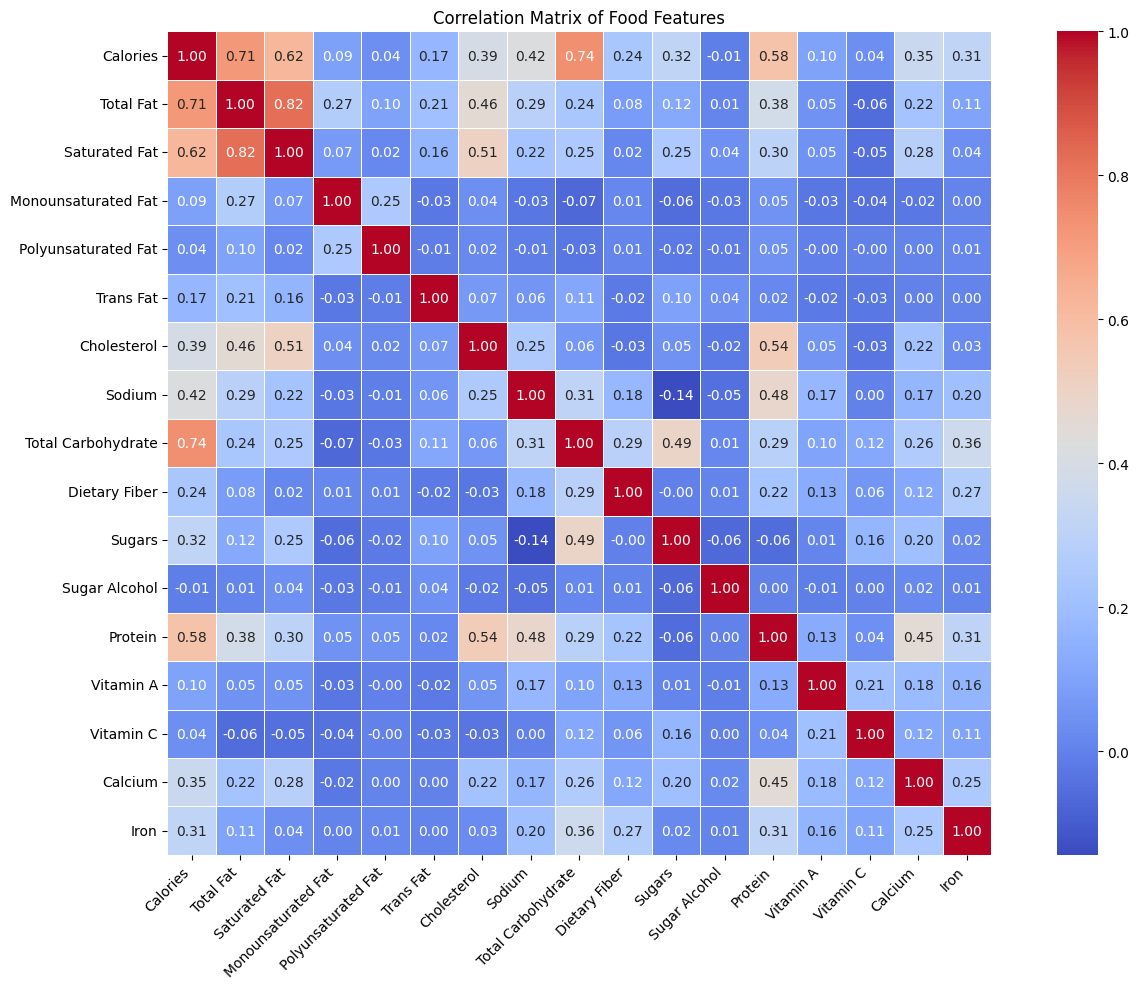

In [14]:
# Correlation Matrix
numeric_df = food_df.drop(columns='class')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Food Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Data Cleaning

### 1. Removing Duplicates

In [15]:
# No.of duplicates
food_duplicates = food_df.duplicated().sum()
print(f"Number of duplicate rows: {food_duplicates}")

Number of duplicate rows: 2341


In [16]:
# Removing duplicates
food_df = food_df.drop_duplicates()
food_df.shape

(10919, 18)

In [17]:
# Resetting index
food_df = food_df.reset_index(drop=True)

In [18]:
food_df.tail(3)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
10916,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2,'In Moderation'
10917,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2,'In Moderation'
10918,120.0,4,0.5,0.0,0.0,0.0,0,55.0,23.0,2.0,13.0,0,2.0,0,0,0,4,'In Moderation'


In [19]:
x=food_df.iloc[:,:-1]
y=food_df.iloc[:,-1]

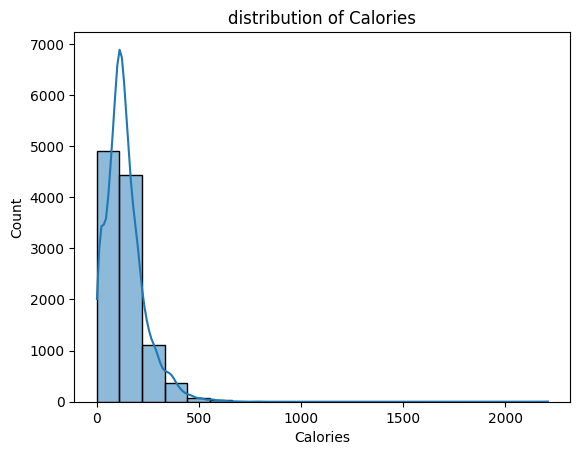

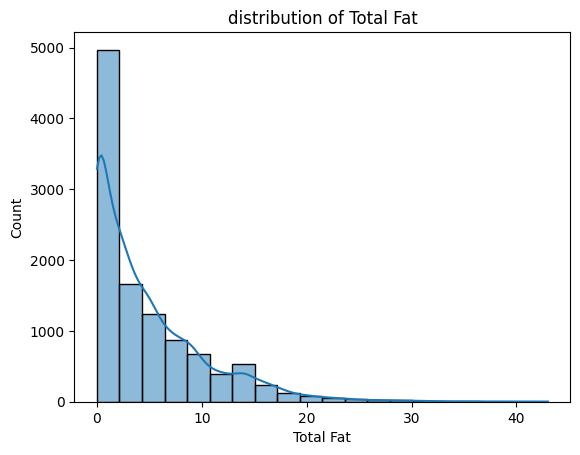

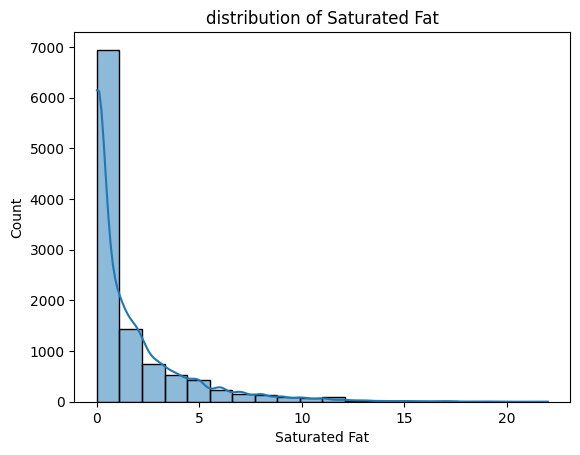

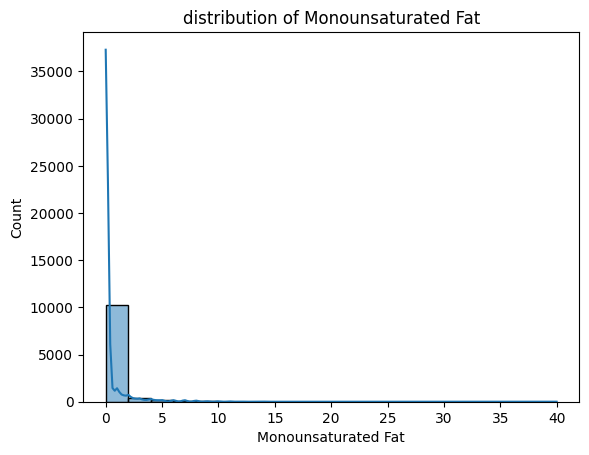

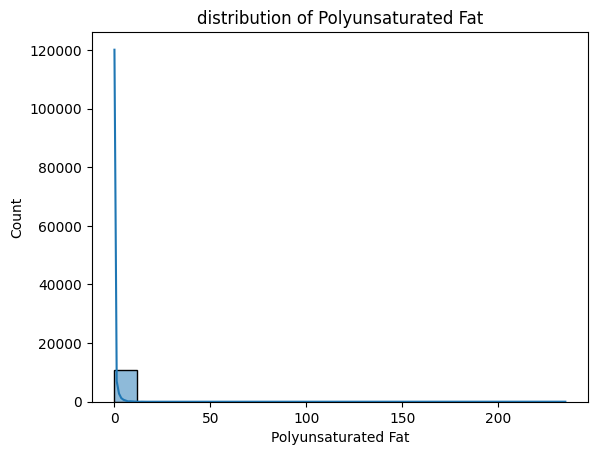

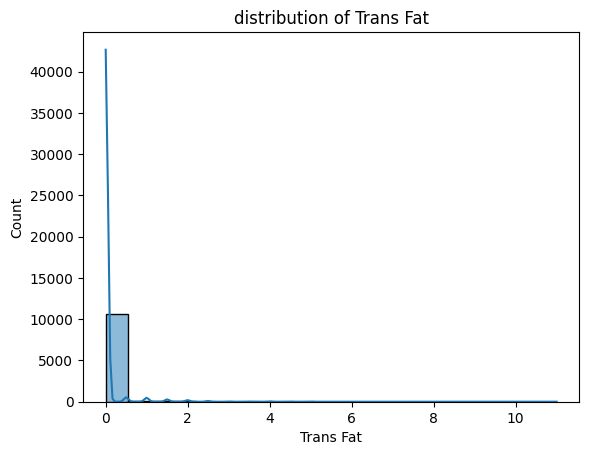

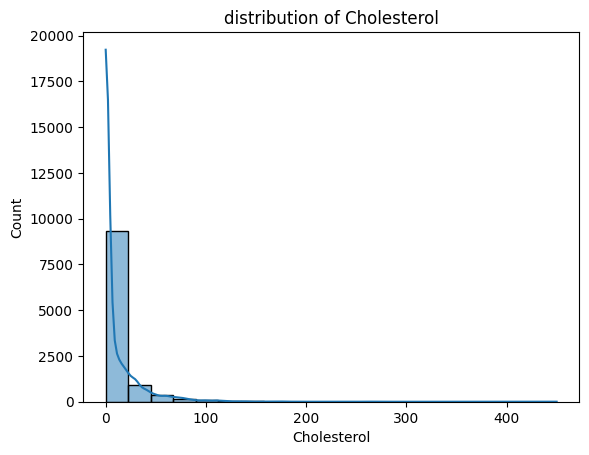

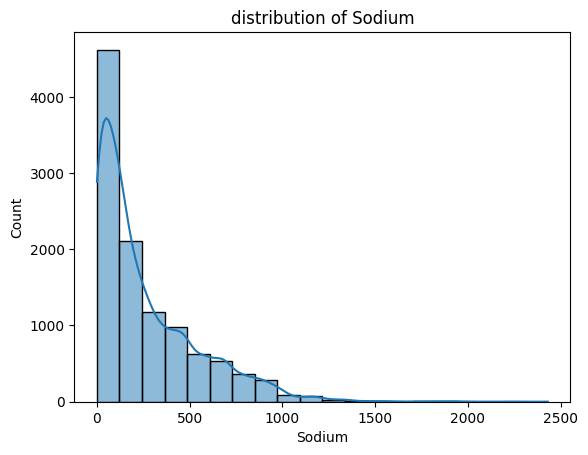

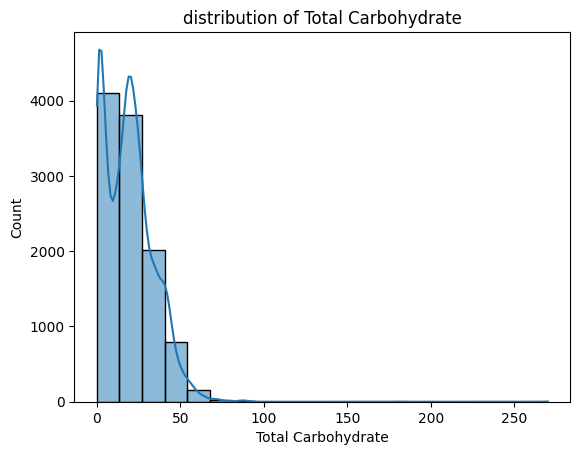

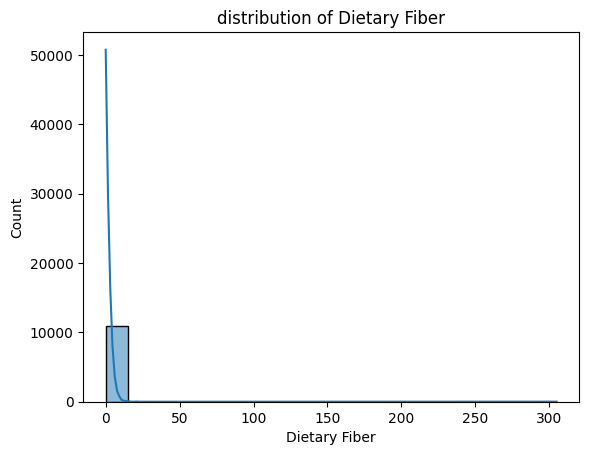

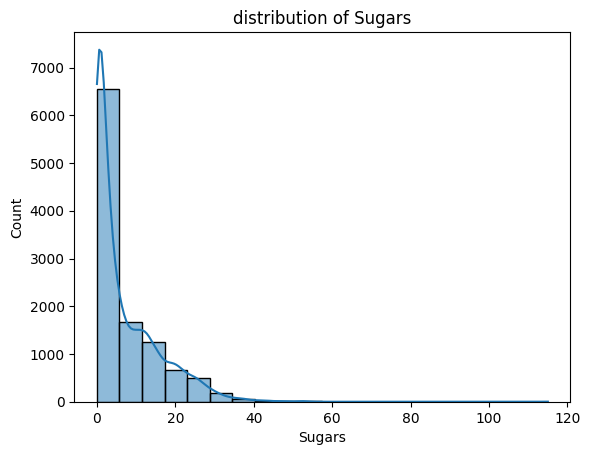

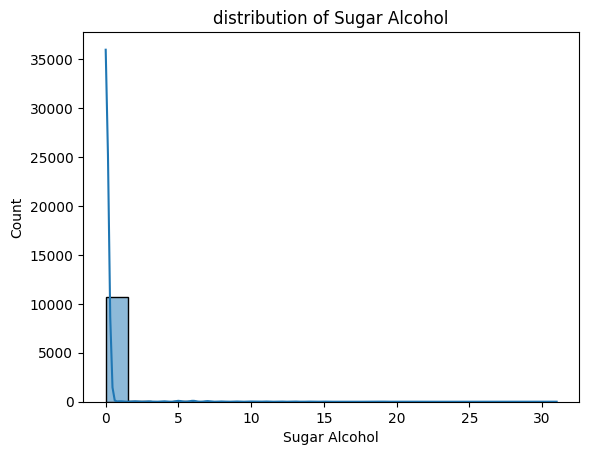

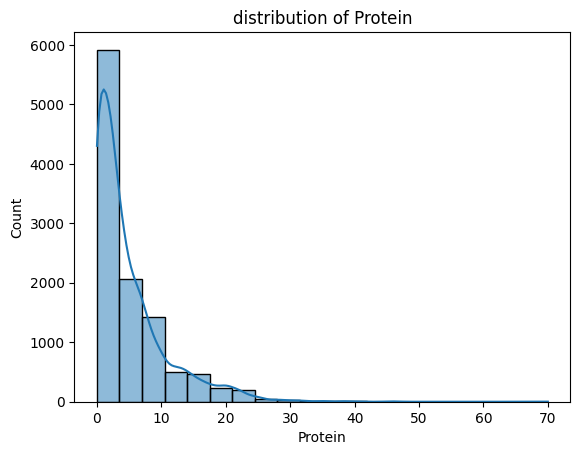

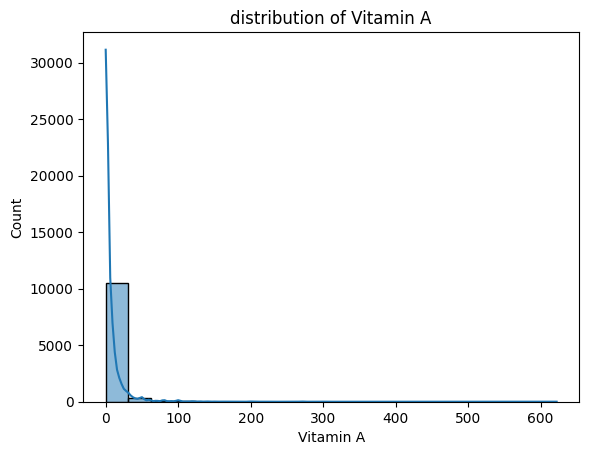

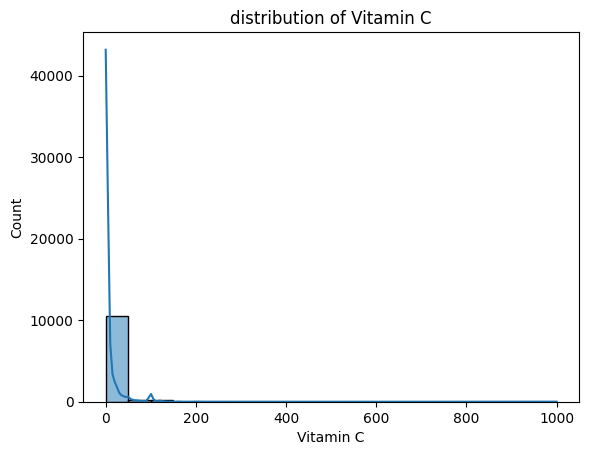

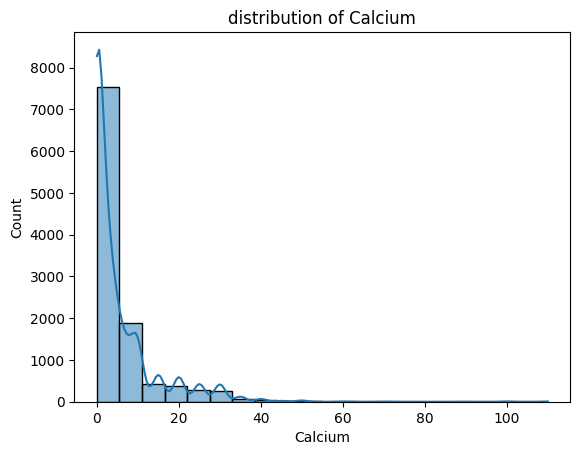

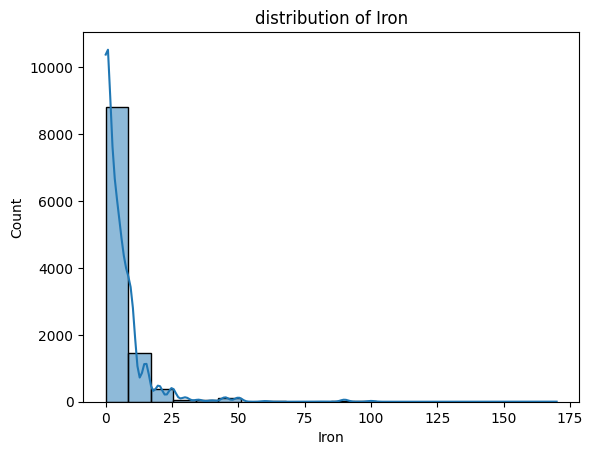

In [20]:
for feature in x:
    sns.histplot(x[feature],kde=True,bins=20)
    plt.title(f'distribution of {feature}')
    plt.show()

In [21]:
from scipy.stats import normaltest,boxcox

In [22]:
for feature in x:
    stat,p=normaltest(x[feature])
    print(f'{feature}--->{p:.4f}')

Calories--->0.0000
Total Fat--->0.0000
Saturated Fat--->0.0000
Monounsaturated Fat--->0.0000
Polyunsaturated Fat--->0.0000
Trans Fat--->0.0000
Cholesterol--->0.0000
Sodium--->0.0000
Total Carbohydrate--->0.0000
Dietary Fiber--->0.0000
Sugars--->0.0000
Sugar Alcohol--->0.0000
Protein--->0.0000
Vitamin A--->0.0000
Vitamin C--->0.0000
Calcium--->0.0000
Iron--->0.0000


In [23]:
for feature in x:
    min_val=x[feature].min()
    if min_val<=0:
        x_shifted=x[feature]-min_val+1
    else:
        x_shifted=x[feature]
    transformed,lam=boxcox(x_shifted)
    stat,p=normaltest(transformed)
    print(f'{feature}--->{p:.4f}')

Calories--->0.0000
Total Fat--->0.0000
Saturated Fat--->0.0000
Monounsaturated Fat--->0.0000
Polyunsaturated Fat--->0.0000
Trans Fat--->0.0000
Cholesterol--->0.0000
Sodium--->0.0000
Total Carbohydrate--->0.0000
Dietary Fiber--->0.0000
Sugars--->0.0000
Sugar Alcohol--->0.0000
Protein--->0.0000
Vitamin A--->0.0000
Vitamin C--->0.0000
Calcium--->0.0000
Iron--->0.0000


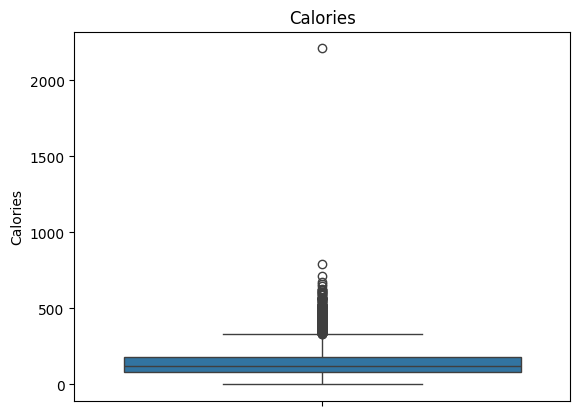

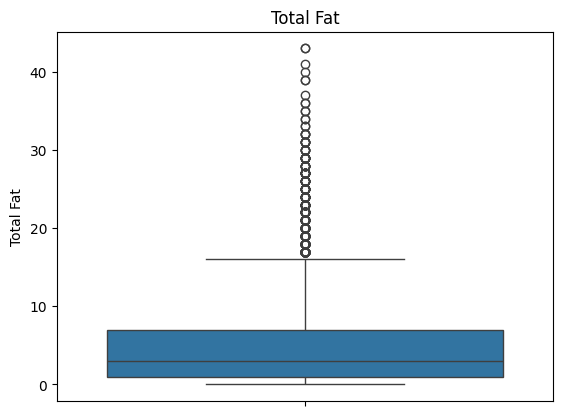

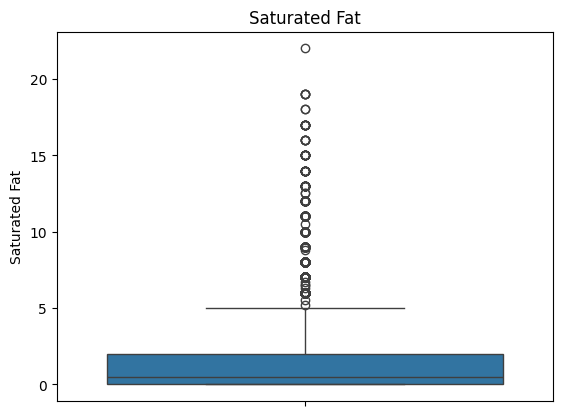

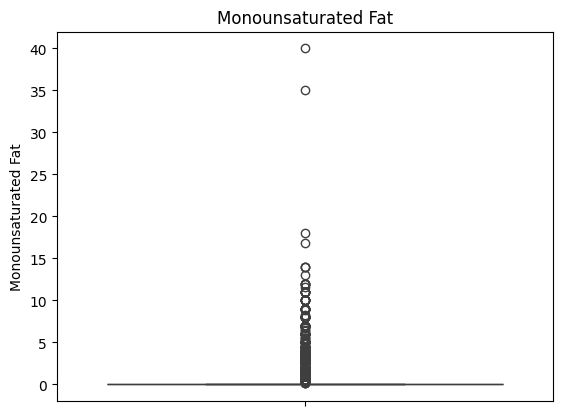

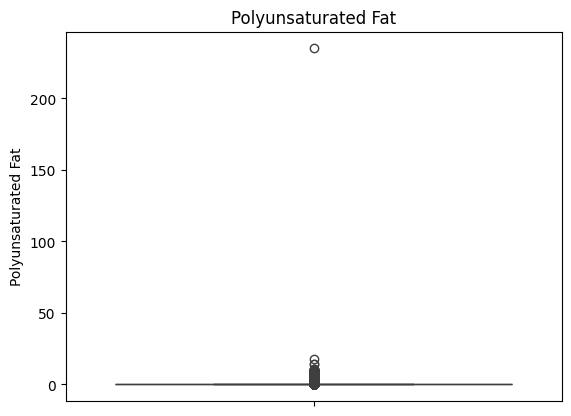

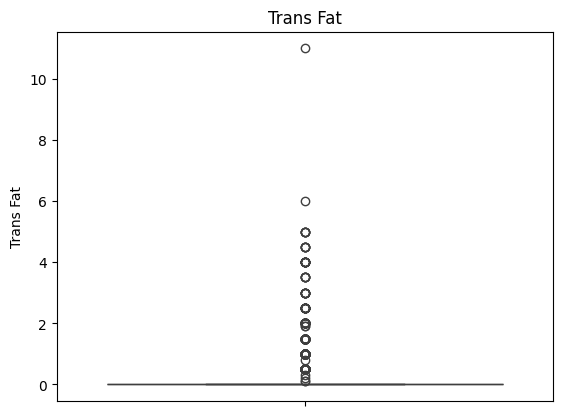

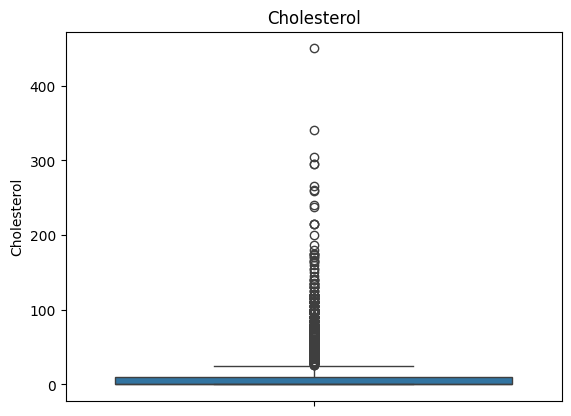

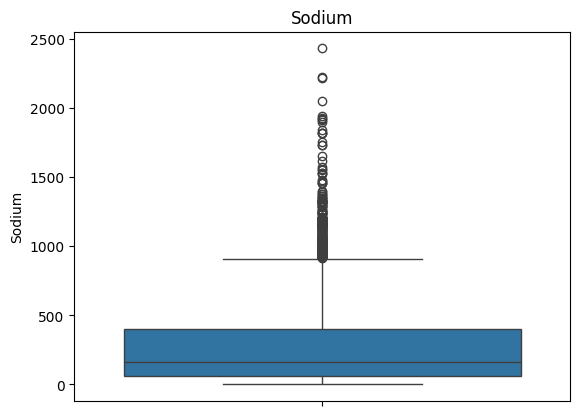

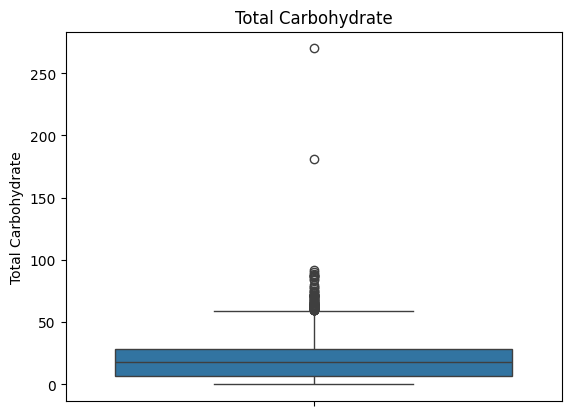

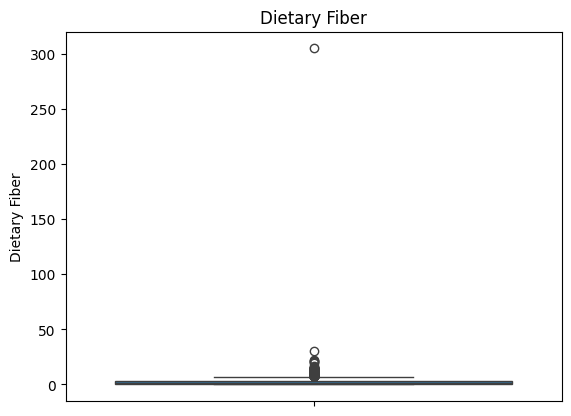

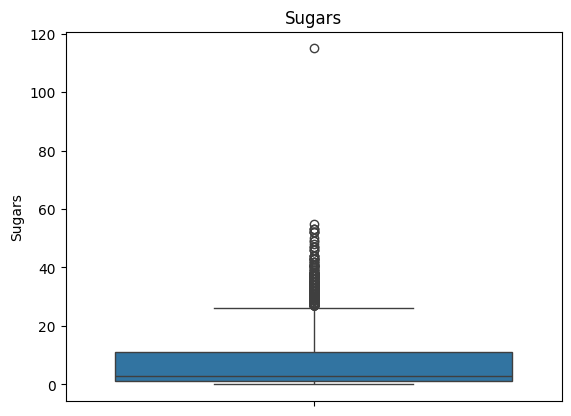

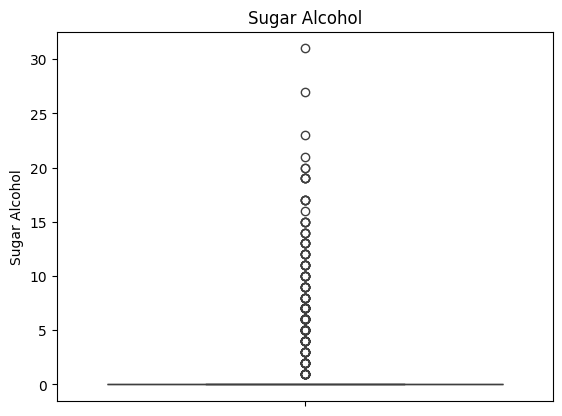

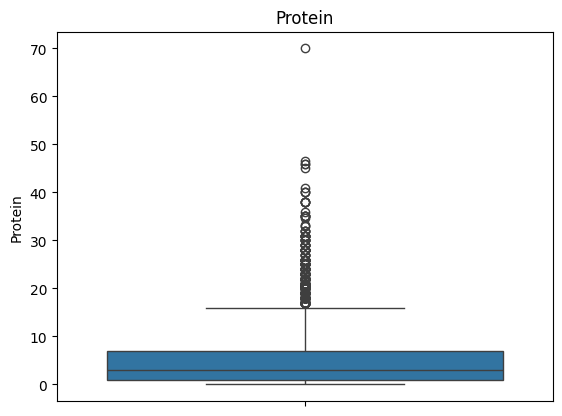

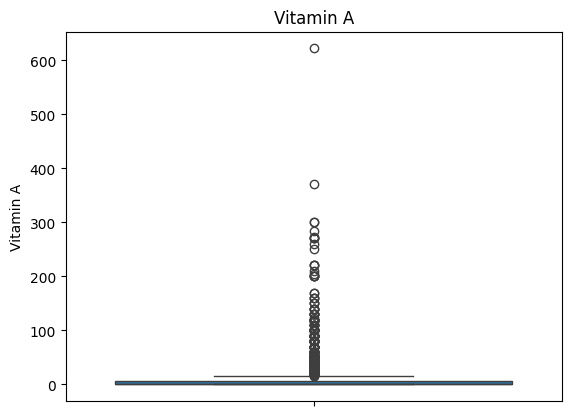

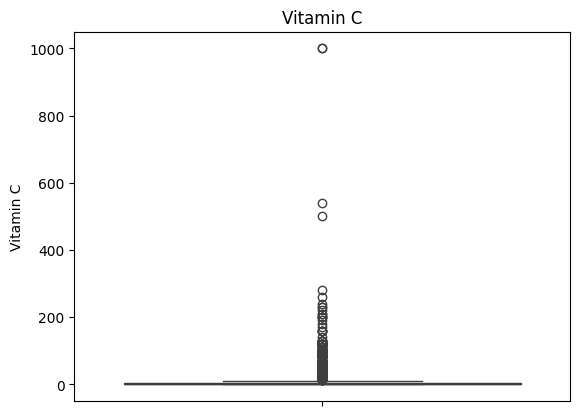

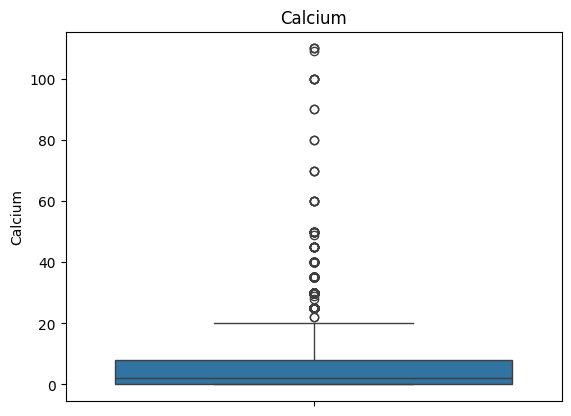

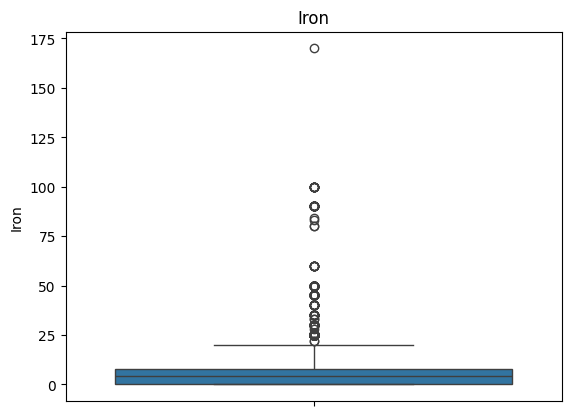

In [24]:
for feature in x:
    
    sns.boxplot(x[feature])
    plt.title(feature)
    plt.show()

In [25]:
x_cleaned=x.copy()
for feature in x:
    Q1=x[feature].quantile(0.25)
    Q3=x[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    x_cleaned=x_cleaned[(x_cleaned[feature]>=lower_bound)&(x_cleaned[feature]<=upper_bound)]
x_cleaned=pd.DataFrame(x_cleaned)
x_cleaned

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10914,140.0,5,1.0,0.0,0.0,0.0,0,60.0,23.0,2.0,13.0,0,2.0,0,0,0,4
10915,130.0,4,0.5,0.0,0.0,0.0,0,50.0,23.0,1.0,14.0,0,2.0,0,0,0,4
10916,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2
10917,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2


In [26]:
le=LabelEncoder()
y_encoded=pd.Series(le.fit_transform(y),name="target")


In [27]:
label_maping=dict(zip(le.classes_,le.transform(le.classes_)))
print(label_maping)

{"'In Moderation'": np.int64(0), "'Less Often'": np.int64(1), "'More Often'": np.int64(2)}


In [28]:
temp=pd.merge(x_cleaned,y_encoded,how='inner',left_index=True,right_index=True)

In [29]:
temp.reset_index(drop=True)
x=temp.iloc[:,:-1]
y=temp.iloc[:,-1]

In [30]:
food_df['class'].value_counts(normalize=True)

class
'In Moderation'    0.486858
'Less Often'       0.453521
'More Often'       0.059621
Name: proportion, dtype: float64

<Axes: xlabel='class'>

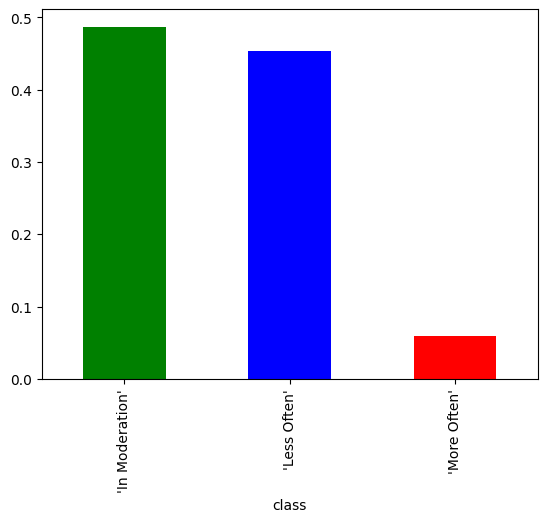

In [31]:
food_df['class'].value_counts(normalize=True).plot.bar(color=['green', 'blue', 'red'])

#### As we can see from the bar chart above, this dataset has three classes: 
- `In Moderation`, `Less Often`, and `More Often`.
-  The three labels are **imbalanced**.
-  For diabetic patients, most food items are in the `In Moderation` and `Less Often` categories. This makes diabetes diet management very hard, so we could build a machine learning model to help patients choose their food.

#### We have three labels meaning our logistic regression model will be multinomial with three classes.

#### `Multinomial logistic regression` model is different from the `one-vs-rest` binary logistic regression. 
- For `one-vs-rest` schema, you need to train an **independent classifier for each class.**
- For example, you need a `More Often` classifier to differentiate a food item between `More Often` and **Not More Often** (or, `In Moderation` and `Less Often`).

# Data Preprocessing

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\1354580319.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option("mode.use_inf_as_na", True)


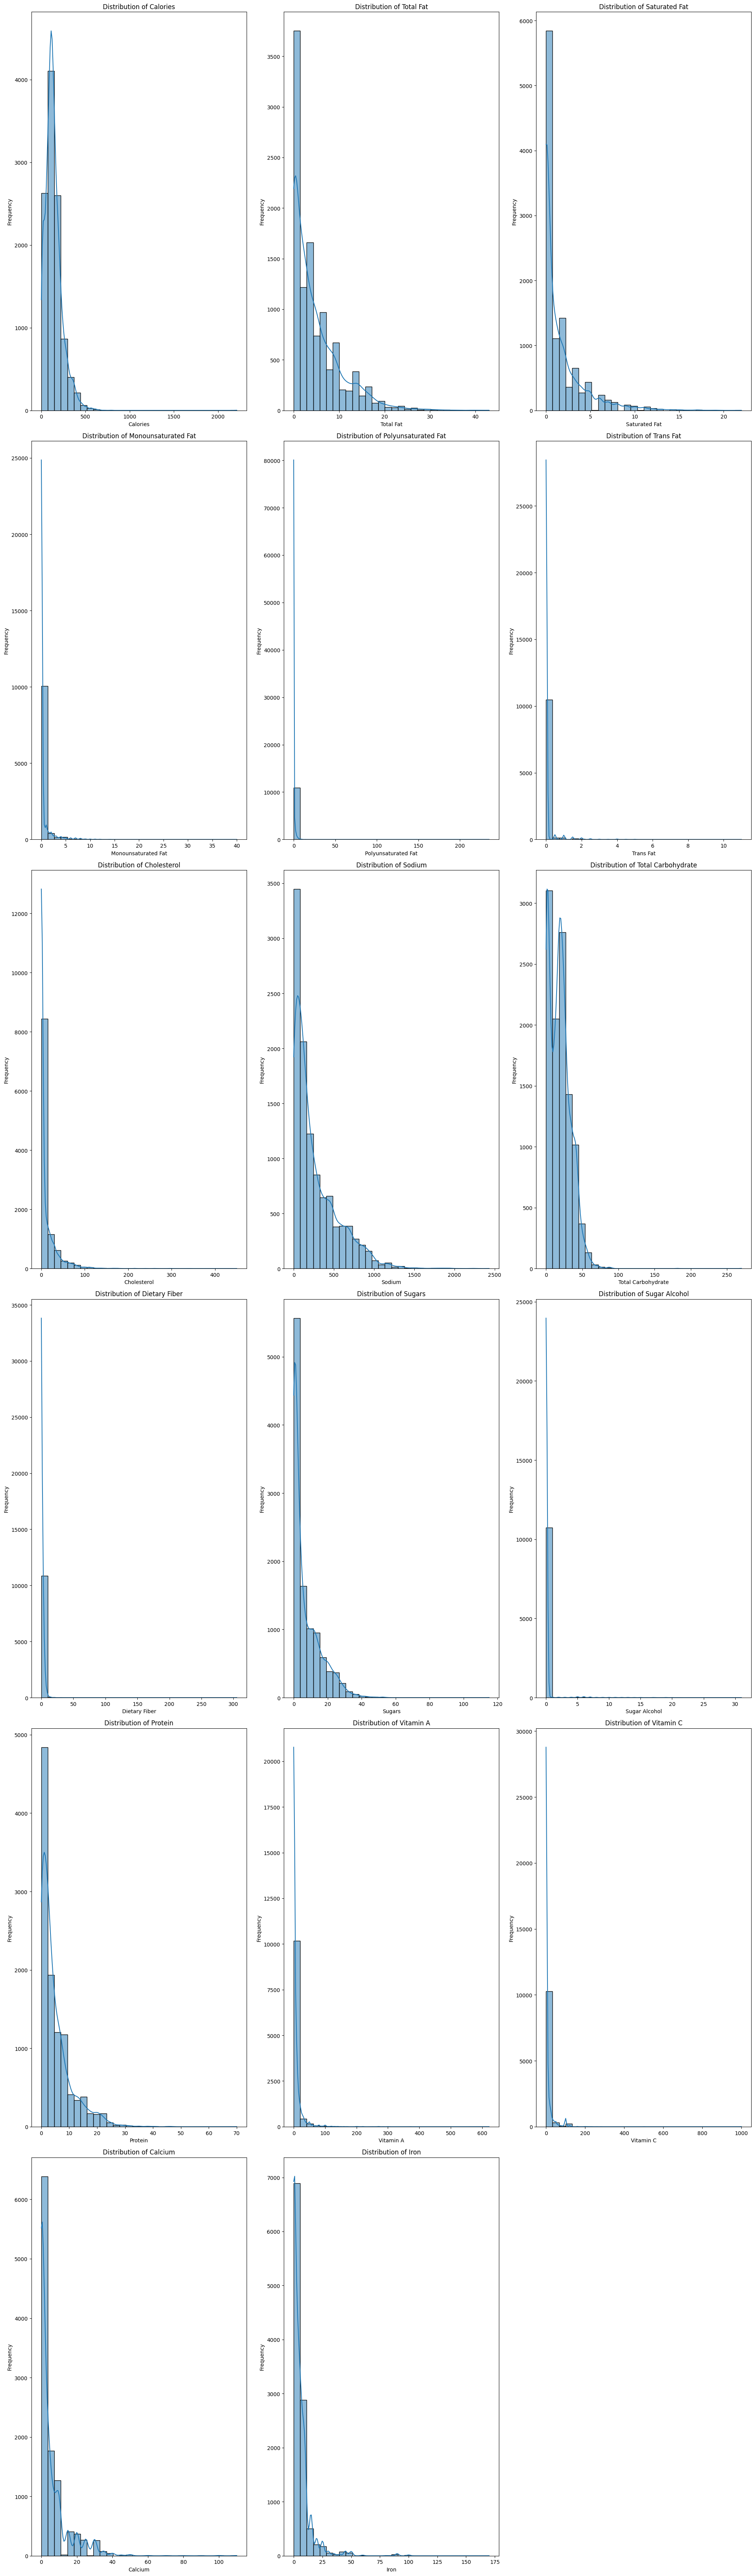

In [32]:
X = food_df.drop(columns='class')

pd.set_option("mode.use_inf_as_na", True)
# distribution of each numerical feature
plt.figure(figsize=(20, len(X.columns) * 4))
for i, col in enumerate(X.columns):
    plt.subplot(len(X.columns) // 3 + 1, 3, i + 1)
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Applying Log Transformation

In [33]:
X_log = X.copy()
X_log = X_log.apply(lambda col: np.log1p(col))

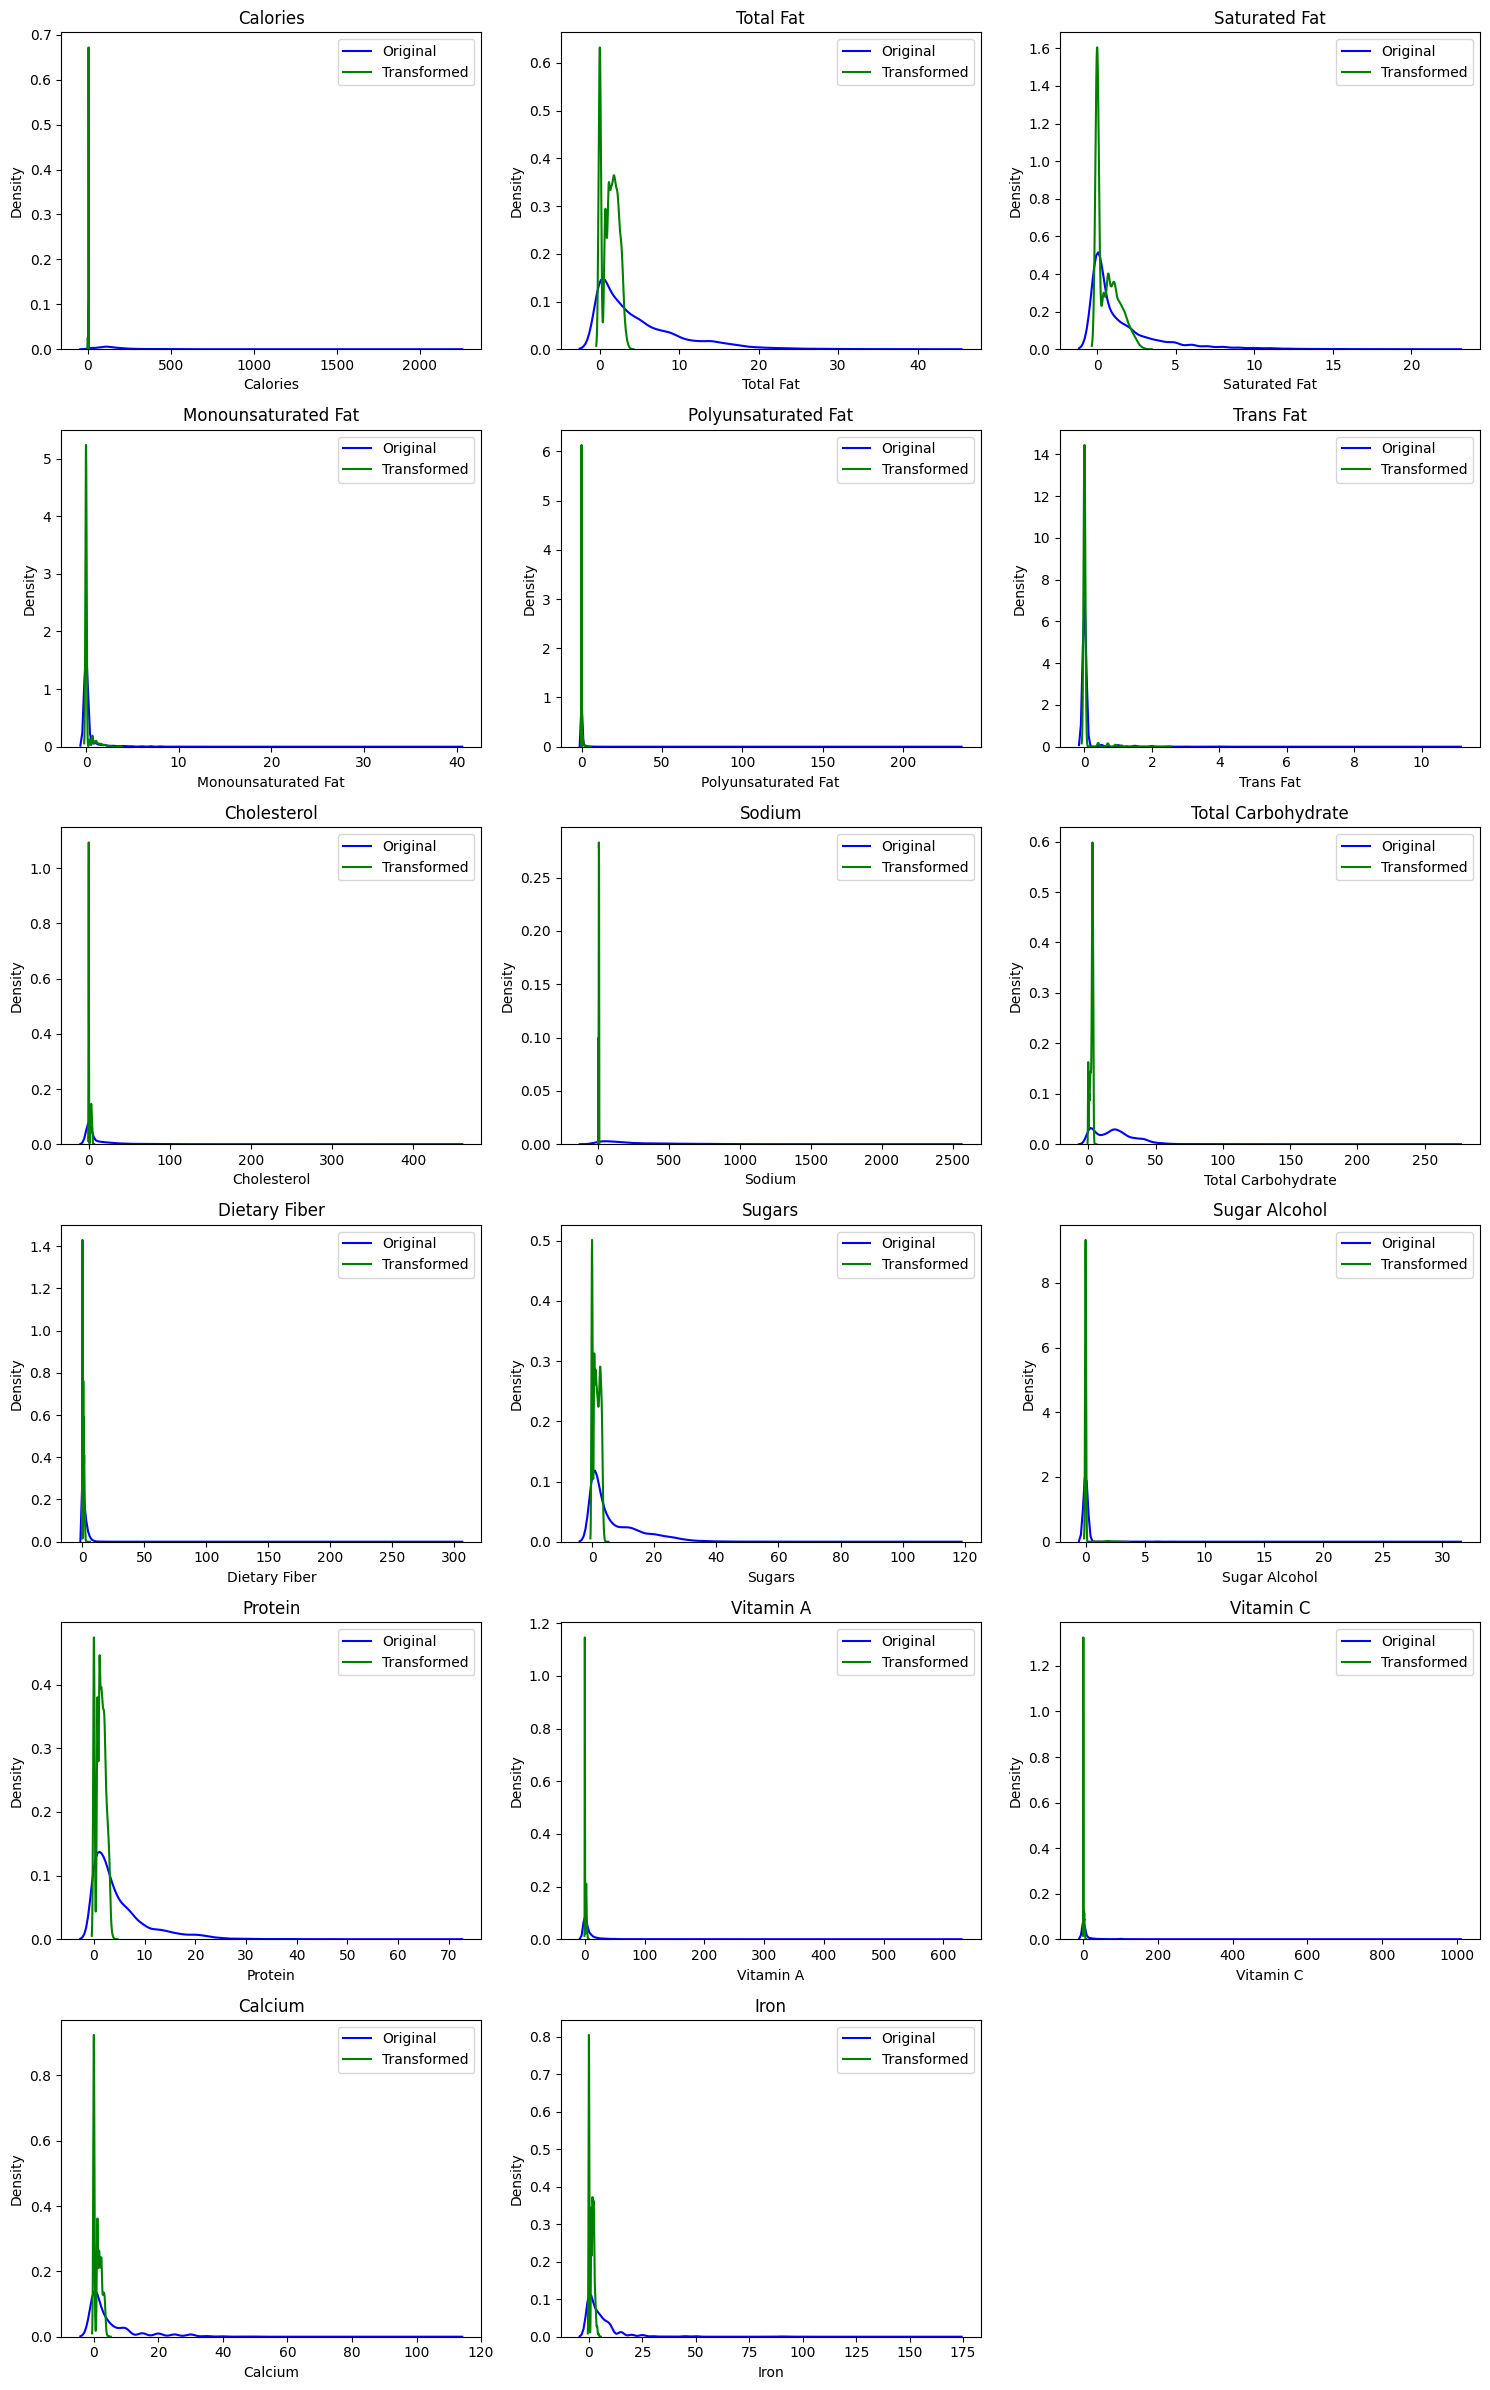

In [34]:
# Comparing before and after log transformation
def compare_distribution(original, transformed, features, n_cols=3):
    n_rows = (len(features) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.kdeplot(original[col], label='Original', color='blue')
        sns.kdeplot(transformed[col], label='Transformed', color='green')
        plt.title(f"{col}")
        plt.legend()

    plt.tight_layout()
    plt.show()

compare_distribution(X, X_log, X.columns)

### Data Splitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=41, stratify=y)

In [36]:
import sklearn
import imblearn
from collections import Counter

print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)


scikit-learn: 1.6.1
imbalanced-learn: 0.13.0


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled1, y_resampled1 = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_resampled1))


After SMOTE: Counter({1: 2268, 0: 2268, 2: 2268})


In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled2, y_resampled2 = ros.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_resampled2))


After SMOTE: Counter({1: 2268, 0: 2268, 2: 2268})


In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled3, y_resampled3 = rus.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_resampled3))


After SMOTE: Counter({0: 402, 1: 402, 2: 402})


### Preprocessing Pipeline

In [40]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

pipeline = Pipeline([
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)

# transforming X_test
X_test_scaled = pipeline.transform(X_test)


In [41]:
print(f"Testing dataset shape, X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (1046, 17), y_test: (1046,)


In [42]:
print(f"Training dataset shape, X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (4181, 17), y_train: (4181,)


In [43]:
X_train_scaled1=pipeline.fit_transform(X_resampled1)
X_train_scaled2=pipeline.fit_transform(X_resampled2)
X_train_scaled3=pipeline.fit_transform(X_resampled3)

# Multinomial Logistic Regression

#### 1. Without Regularization

In [44]:
clf = LogisticRegression(multi_class='multinomial',class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)

clf.fit(X_train_scaled, y_train)

# predcitions
y_pred = clf.predict(X_test_scaled)
y_proba=clf.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [45]:
ovr=LogisticRegression(multi_class='ovr',class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)
ovr.fit(X_train_scaled, y_train)
y_pred_ovr = ovr.predict(X_test_scaled)
y_proba_ovr=ovr.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [46]:
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
clf1.fit(X_train_scaled1, y_resampled1)
y_pred1=clf.predict(X_test_scaled)
y_proba_1=clf1.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [47]:
clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
clf2.fit(X_train_scaled2, y_resampled2)
y_pred2=clf.predict(X_test_scaled)
y_proba_2=clf2.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [48]:
clf3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
clf3.fit(X_train_scaled3, y_resampled3)
y_pred3=clf.predict(X_test_scaled)
y_proba_3=clf3.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [49]:
probs=[y_proba,y_proba_ovr,y_proba_1,y_proba_2,y_proba_3]
predictions=[y_pred,y_pred_ovr,y_pred1,y_pred2,y_pred3]
models=['multinomial','OVR','SMOTE','over sampling','under sampling']

predictions_probs_models=list(zip(predictions,probs,models))
predictions_probs=list(zip(predictions,probs))
predictions_models=list(zip(predictions,models))
probs_models=list(zip(probs,models))


In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
def evaluate_metrics(yt, yp,y_prob):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    results_pos['roc_auc'] = roc_auc_score(yt,y_prob,average='macro', multi_class='ovr')
    return results_pos

In [52]:
for prediction,probability,model in predictions_probs_models:
    print(f"{model} {evaluate_metrics(y_test,prediction,probability)}")
    

multinomial {'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.9056184380280428)}
OVR {'accuracy': 0.7743785850860421, 'recall': array([0.75528169, 0.74338624, 1.        ]), 'precision': array([0.825     , 0.74933333, 0.66225166]), 'f1score': array([0.78860294, 0.74634794, 0.79681275]), 'roc_auc': np.float64(0.907091161381556)}
SMOTE {'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.8896202779208547)}
over sampling {'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.8877

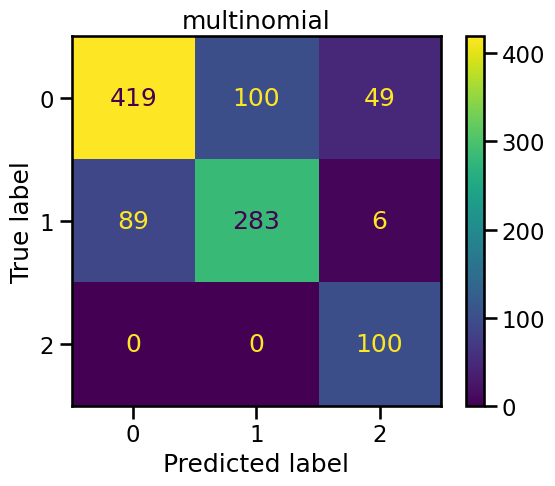

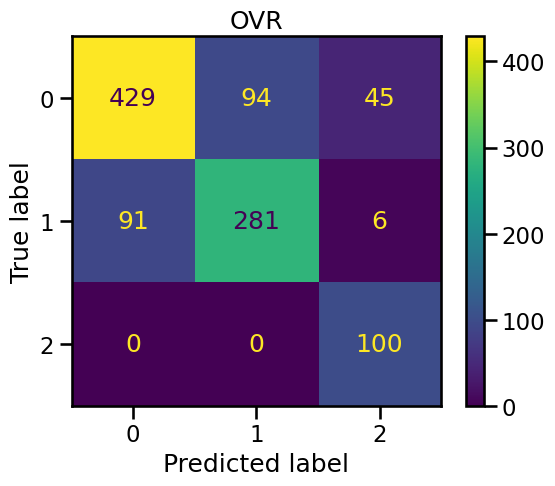

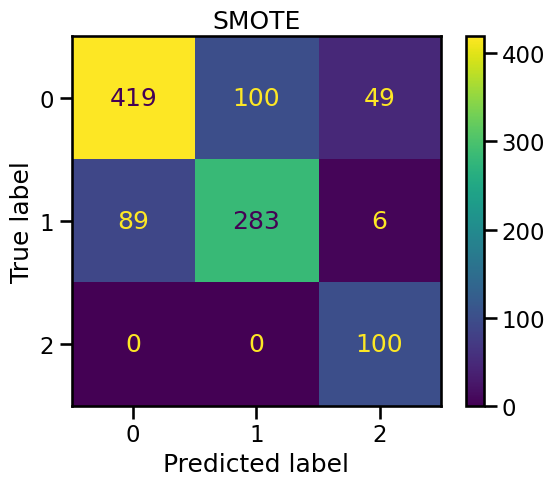

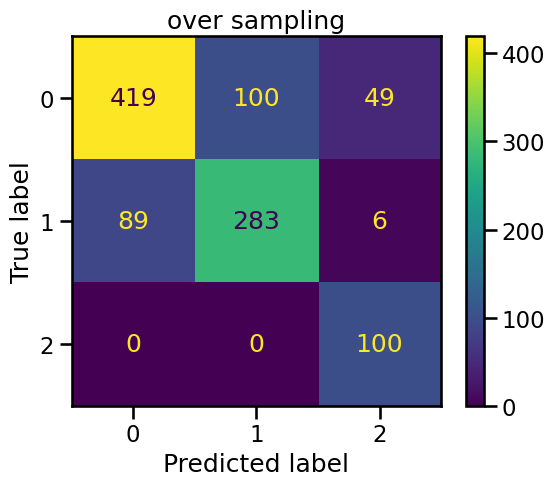

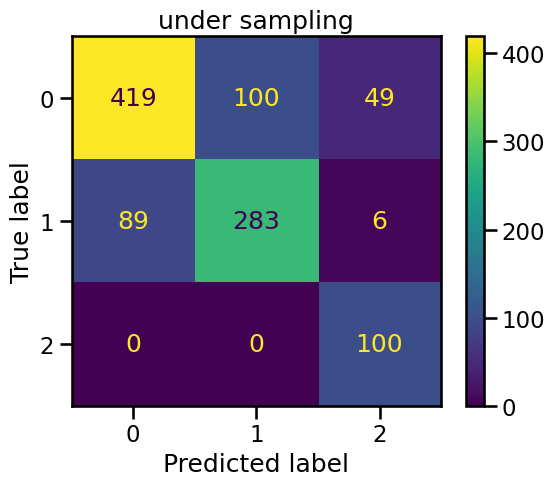

In [53]:
for prediction,model in predictions_models:
    cf = confusion_matrix(y_test, prediction)
    sns.set_context('talk')
    disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=clf.classes_)
    disp.plot()
    plt.title(model)
    plt.show()

In [54]:
food_df['class'].value_counts(normalize=True)

class
'In Moderation'    0.486858
'Less Often'       0.453521
'More Often'       0.059621
Name: proportion, dtype: float64

In [55]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize



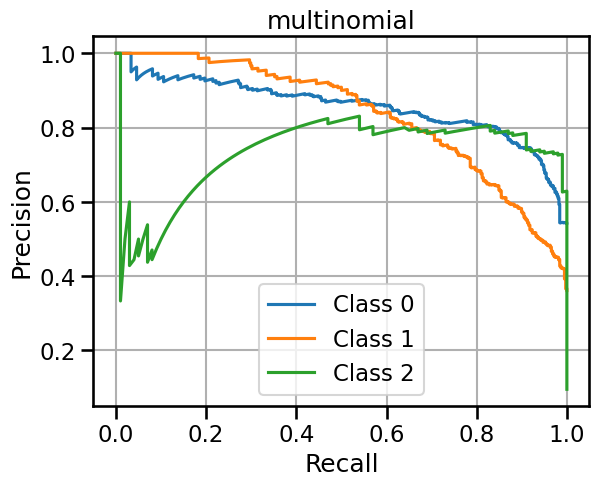

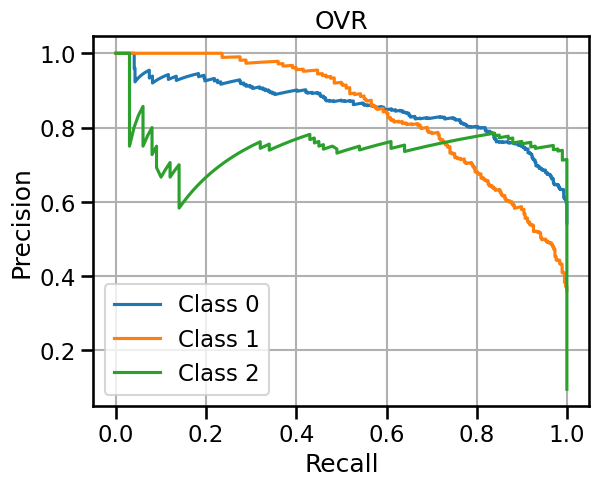

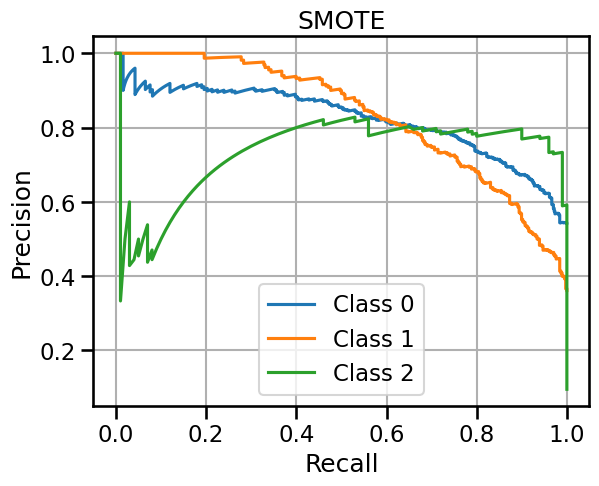

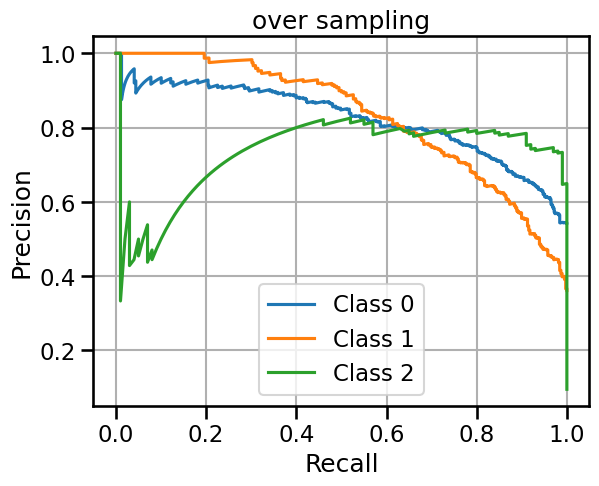

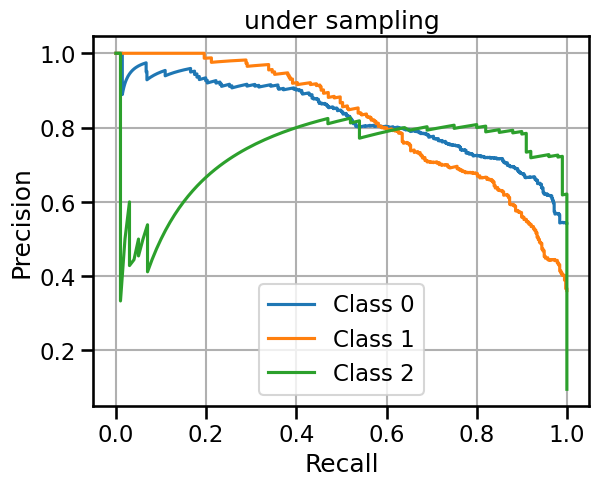

In [56]:
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
for probability,model in probs_models:
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:,i], probability[:,i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(model)
    plt.legend()
    plt.grid(True)
    plt.show()

In [57]:
from sklearn.metrics import roc_curve


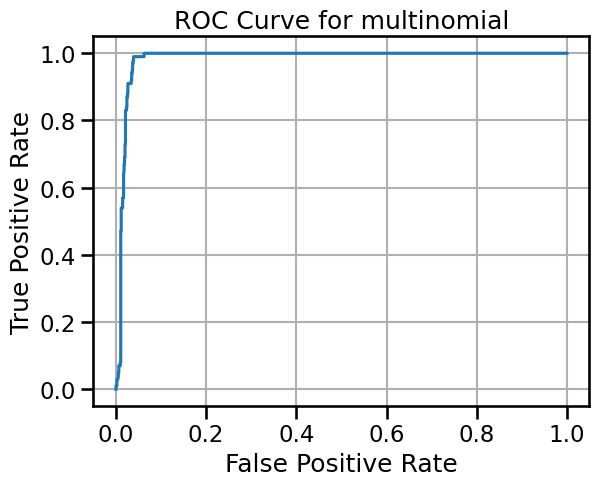

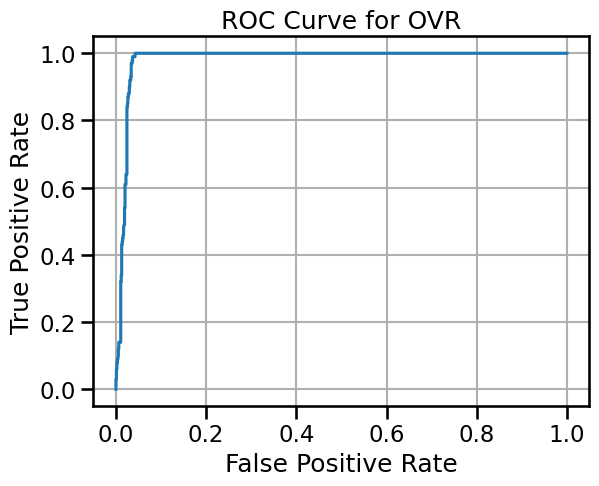

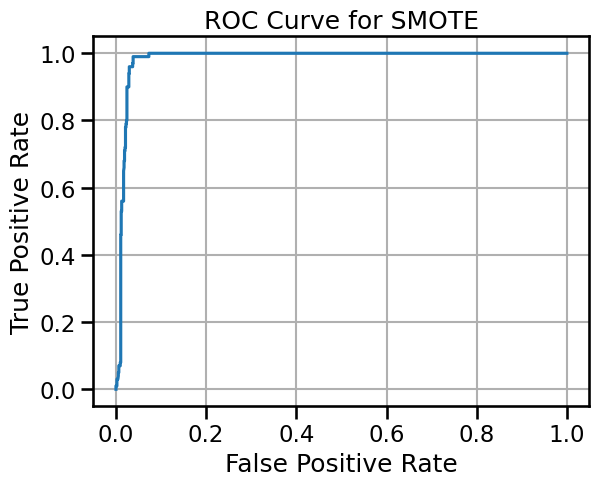

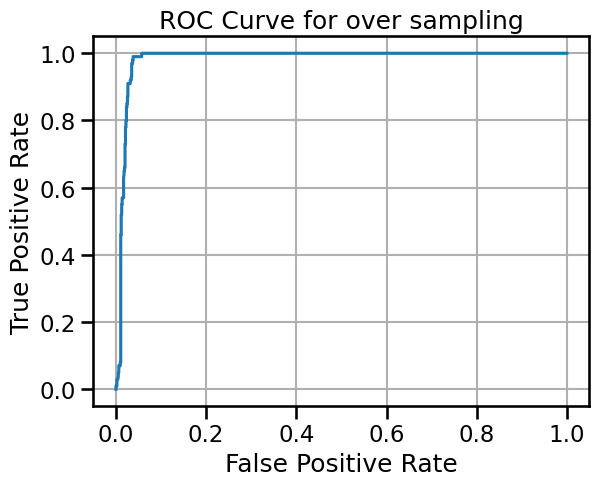

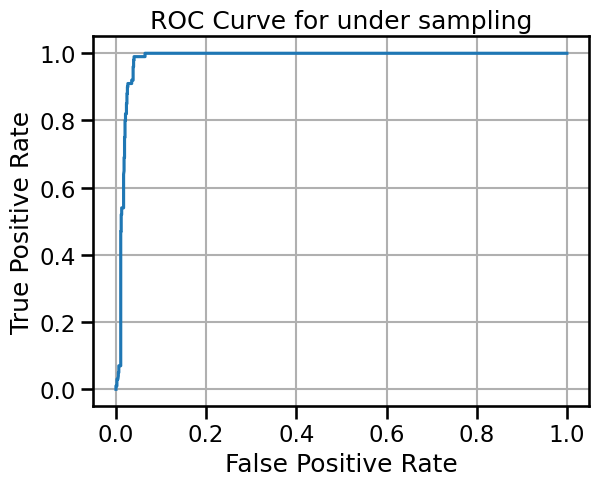

In [58]:

for probability,model in probs_models:
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:,i], probability[:,i])

    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model}")
    plt.grid(True)
    plt.show()

### Features Importance

In [93]:
modelss=[clf,ovr,clf1,clf2,clf3]
models_models_names=list(zip(models,modelss))
for name,model in models_models_names:
    print(name,model.coef_)

multinomial [[ 0.28338468  0.48765735 -0.27737943  0.          0.          0.
   0.13065411  0.10924916  0.49117618  0.12080246 -0.23962489  0.
   0.35504082 -0.06886272 -0.09550222  0.0578028   0.00233484]
 [ 0.85718927  0.70086832  1.16373336  0.          0.          0.
   0.26280546 -0.14915765  0.74016404 -0.29236659  0.12026725  0.
  -0.40051584 -0.09171036 -0.05325021  0.01407124 -0.11786994]
 [-1.14057394 -1.18852567 -0.88635393  0.          0.          0.
  -0.39345957  0.03990849 -1.23134022  0.17156413  0.11935763  0.
   0.04547502  0.16057307  0.14875243 -0.07187404  0.1155351 ]]
OVR [[ 0.74955311  0.04711336 -1.79266715  0.          0.          0.
   0.0451626   0.26452647 -0.23027557  0.33738884 -0.28734725  0.
   0.53412647  0.01858148 -0.11995295  0.05925477 -0.00647967]
 [ 0.80644947  0.28726705  1.3667729   0.          0.          0.
   0.14959162 -0.22954709  0.24332482 -0.42201054  0.36594805  0.
  -0.7495845  -0.01307246  0.00363031 -0.03880152 -0.15256255]
 [-1.993

#### The `coef_` is a coefficients list with three elements, one element is the actual coefficent for class 0, 1, 2.
- To better analyze the coefficients, use three utility methods to sort and visualize them.

In [60]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# visualizing coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

#### Coefficients for Classes

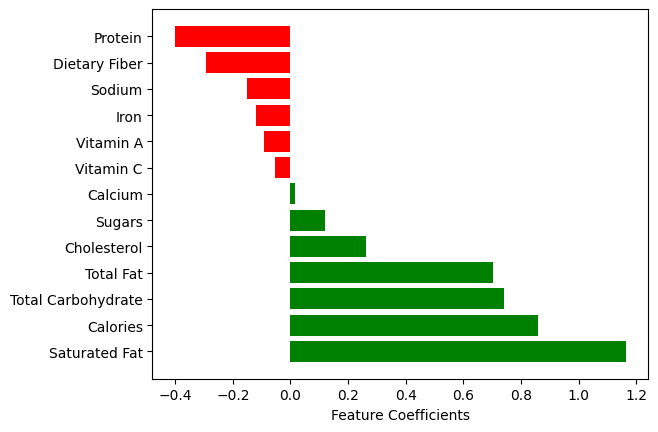

In [61]:
# coefficents for Class 1, `Less Often`
coef_dict = get_feature_coefs(clf, 1, feature_cols)
visualize_coefs(coef_dict)

#### Unhealthy nutrients such as `Saturated Fat`, `Sugars`, `Cholesterol`, `Total Fat`, other fats., have high positive coefficients.
- Food items containing unhealthy nutrients will have **higher coeficients** and will be more likely to be categorized in the 'Less Often' class.

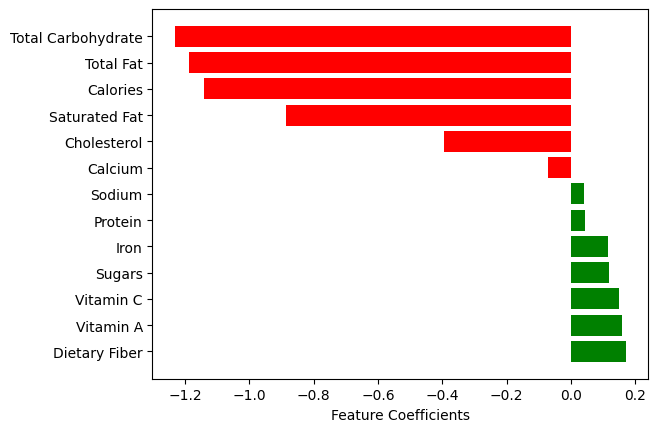

In [62]:
# coefficents for Class 2, `More Often` ==> healthiest options
coef_dict = get_feature_coefs(clf, 2, feature_cols)
visualize_coefs(coef_dict)

#### 2.  `L1-Regularized` Multinomial Logistic Regression

In [63]:
l2_model = LogisticRegression(
    penalty='l2',
    multi_class='multinomial',
    solver='lbfgs',  # works with l2
    C=0.01,            # inverse of regularization strength (lambda)
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'
)
l2_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_l2 = l2_model.predict(X_test_scaled)
y_proba_l2=l2_model.predict_proba(X_test_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [64]:
l2_model_ovr= LogisticRegression(
    penalty='l2',
    multi_class='ovr',
    solver='lbfgs',  # works with l2
    C=0.01,            # inverse of regularization strength (lambda)
    random_state=42, 
    max_iter=1000,
    class_weight='balanced')
l2_model_ovr.fit(X_train_scaled, y_train)
y_pred_l2_ovr = l2_model_ovr.predict(X_test_scaled)
y_proba_l2_ovr=l2_model_ovr.predict_proba(X_test_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [65]:
l2_model1=LogisticRegression(
    penalty='l2',
    multi_class='ovr',
    solver='lbfgs',  # works with l2
    C=0.01,            # inverse of regularization strength (lambda)
    random_state=42, 
    max_iter=1000)
l2_model1.fit(X_train_scaled1, y_resampled1)
y_pred_l2_1 = l2_model1.predict(X_test_scaled)
y_proba_l2_1=l2_model1.predict_proba(X_test_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [66]:
l2_model2=LogisticRegression(
    penalty='l2',
    multi_class='ovr',
    solver='lbfgs',  # works with l2
    C=0.01,            # inverse of regularization strength (lambda)
    random_state=42, 
    max_iter=1000)
l2_model2.fit(X_train_scaled2, y_resampled2)
y_pred_l2_2 = l2_model2.predict(X_test_scaled)
y_proba_l2_2=l2_model2.predict_proba(X_test_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [67]:
l2_model3=LogisticRegression(
    penalty='l2',
    multi_class='ovr',
    solver='lbfgs',  # works with l2
    C=0.01,            # inverse of regularization strength (lambda)
    random_state=42, 
    max_iter=1000)
l2_model3.fit(X_train_scaled3, y_resampled3)
y_pred_l2_3 = l2_model3.predict(X_test_scaled)
y_proba_l2_3=l2_model3.predict_proba(X_test_scaled)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [68]:
predictions=[y_pred_l2,y_pred_l2_1,y_pred_l2_2,y_pred_l2_3]
probs=[y_proba_l2,y_proba_l2_ovr,y_proba_l2_1,y_proba_l2_2,y_proba_l2_3]
for prediction,proba,model in predictions_probs_models:
    print(f"{model} {evaluate_metrics(y_test, prediction,proba)}")

multinomial {'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.9056184380280428)}
OVR {'accuracy': 0.7743785850860421, 'recall': array([0.75528169, 0.74338624, 1.        ]), 'precision': array([0.825     , 0.74933333, 0.66225166]), 'f1score': array([0.78860294, 0.74634794, 0.79681275]), 'roc_auc': np.float64(0.907091161381556)}
SMOTE {'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.8896202779208547)}
over sampling {'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.8877

In [94]:
for prediction,model in predictions_models:
     print(f"{model}\n{classification_report(y_test, prediction, target_names=le.classes_)}")

multinomial
                 precision    recall  f1-score   support

'In Moderation'       0.82      0.74      0.78       568
   'Less Often'       0.74      0.75      0.74       378
   'More Often'       0.65      1.00      0.78       100

       accuracy                           0.77      1046
      macro avg       0.74      0.83      0.77      1046
   weighted avg       0.78      0.77      0.77      1046

OVR
                 precision    recall  f1-score   support

'In Moderation'       0.82      0.76      0.79       568
   'Less Often'       0.75      0.74      0.75       378
   'More Often'       0.66      1.00      0.80       100

       accuracy                           0.77      1046
      macro avg       0.75      0.83      0.78      1046
   weighted avg       0.78      0.77      0.77      1046

SMOTE
                 precision    recall  f1-score   support

'In Moderation'       0.82      0.74      0.78       568
   'Less Often'       0.74      0.75      0.74       378
  

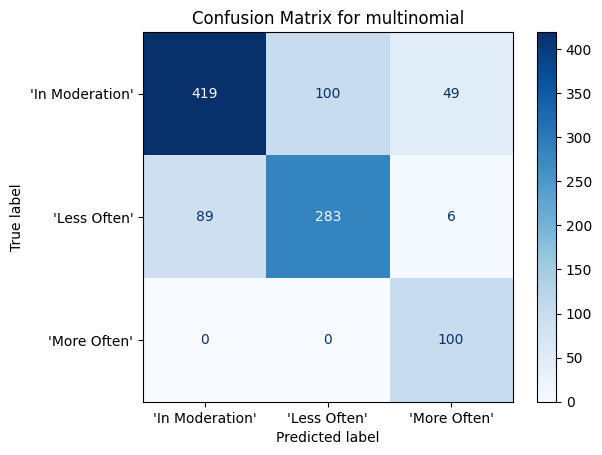

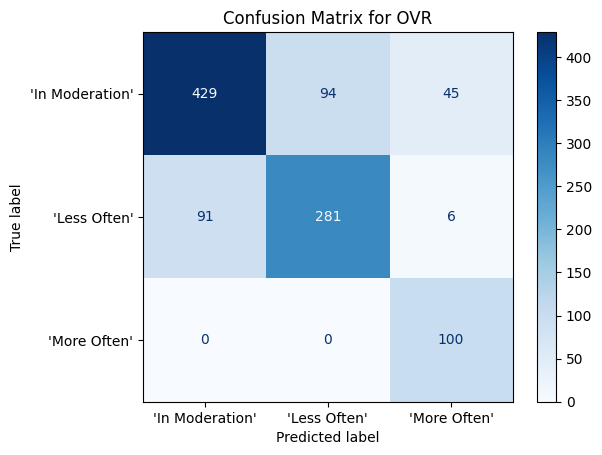

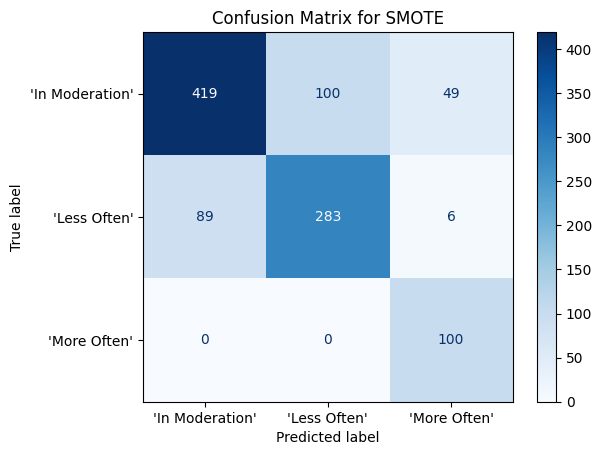

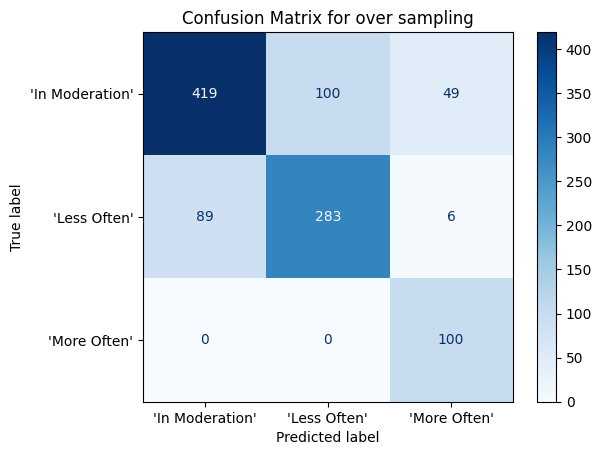

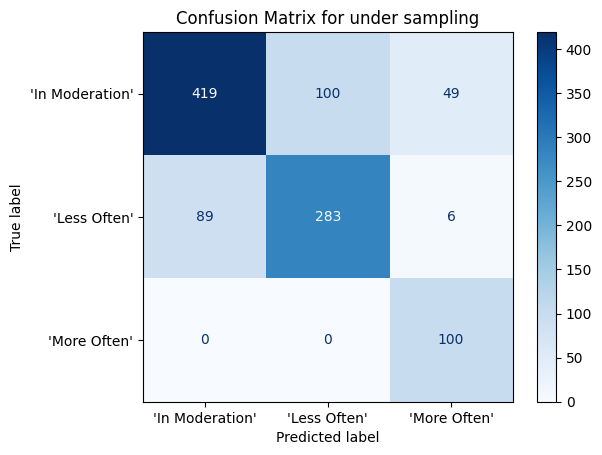

In [70]:
for prediction,model in predictions_models:

    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model}")
    plt.show()

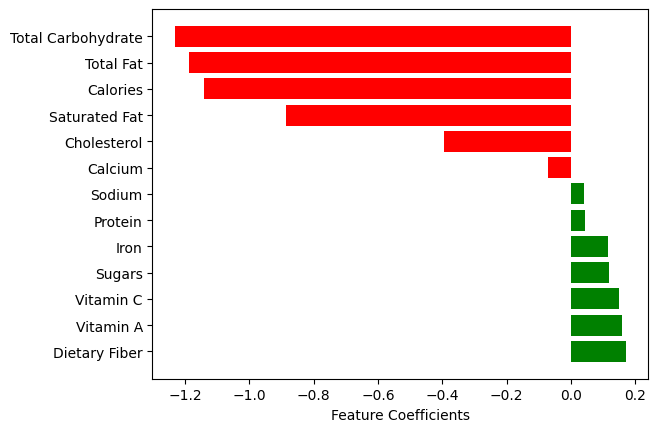

In [71]:
# coefficents for Class 1, `Less Often`
coef_dict = get_feature_coefs(clf, 2, feature_cols)
visualize_coefs(coef_dict)

#### 3.  `L1-Regularized` Multinomial Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

l1_model = LogisticRegression(
    penalty='l1',
    solver='saga',               
    multi_class='multinomial',   
    C=0.01,                      
    max_iter=5000,              
    random_state=42,
    class_weight='balanced'
)

l1_model.fit(X_train_scaled, y_train)
y_pred_l1 = l1_model.predict(X_test_scaled)
y_proba_l1=l1_model.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [73]:
l1_model_ovr = LogisticRegression(
    penalty='l1',
    solver='saga',               
    multi_class='ovr',   
    C=0.01,                      
    max_iter=5000,              
    random_state=42,
    class_weight='balanced'
)

l1_model_ovr.fit(X_train_scaled, y_train)
y_pred_l1_ovr = l1_model_ovr.predict(X_test_scaled)
y_proba_l1_ovr=l1_model_ovr.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [74]:
l1_model1 = LogisticRegression(
    penalty='l1',
    solver='saga',               
    multi_class='multinomial',   
    C=0.01,                      
    max_iter=5000,              
    random_state=42
)

l1_model1.fit(X_train_scaled1, y_resampled1)
y_pred_l1_1 = l1_model1.predict(X_test_scaled)
y_proba_l1_1=l1_model1.predict_proba(X_test_scaled)



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [75]:
l1_model2 = LogisticRegression(
    penalty='l1',
    solver='saga',               
    multi_class='multinomial',   
    C=0.01,                      
    max_iter=5000,              
    random_state=42
)

l1_model2.fit(X_train_scaled2, y_resampled2)
y_pred_l1_2 = l1_model2.predict(X_test_scaled)
y_proba_l1_2=l1_model2.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [76]:
l1_model3 = LogisticRegression(
    penalty='l1',
    solver='saga',               
    multi_class='multinomial',   
    C=0.01,                      
    max_iter=5000,              
    random_state=42
)

l1_model3.fit(X_train_scaled3, y_resampled3)
y_pred_l1_3 = l1_model3.predict(X_test_scaled)
y_proba_l1_3=l1_model3.predict_proba(X_test_scaled)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [95]:
predictions=[y_pred_l1,y_pred_l1_1,y_pred_l1_2,y_pred_l1_3]
probs=[y_proba_l1,y_proba_l1_ovr,y_proba_l1_1,y_proba_l1_2,y_proba_l1_3]
for prediction,proba,model in predictions_probs_models:
    print(f"{model}\n{evaluate_metrics(y_test,prediction,proba)}")
    print(classification_report(y_test, prediction, target_names=le.classes_))

multinomial
{'accuracy': 0.7667304015296367, 'recall': array([0.73767606, 0.74867725, 1.        ]), 'precision': array([0.82480315, 0.73890339, 0.64516129]), 'f1score': array([0.77881041, 0.74375821, 0.78431373]), 'roc_auc': np.float64(0.9056184380280428)}
                 precision    recall  f1-score   support

'In Moderation'       0.82      0.74      0.78       568
   'Less Often'       0.74      0.75      0.74       378
   'More Often'       0.65      1.00      0.78       100

       accuracy                           0.77      1046
      macro avg       0.74      0.83      0.77      1046
   weighted avg       0.78      0.77      0.77      1046

OVR
{'accuracy': 0.7743785850860421, 'recall': array([0.75528169, 0.74338624, 1.        ]), 'precision': array([0.825     , 0.74933333, 0.66225166]), 'f1score': array([0.78860294, 0.74634794, 0.79681275]), 'roc_auc': np.float64(0.907091161381556)}
                 precision    recall  f1-score   support

'In Moderation'       0.82      0.7

In [78]:
# Which features are used
# non-zero coefficients per class
modelss=[l1_model,l1_model_ovr,l1_model1,l1_model2,l1_model3]

for name,model in models_models_names:
    nonzero_counts = np.sum(l1_model.coef_ != 0, axis=1)
    print(f"{name}--> Number of non-zero coefficients per class: {nonzero_counts}" )

multinomial--> Number of non-zero coefficients per class: [2 5 3]
OVR--> Number of non-zero coefficients per class: [2 5 3]
SMOTE--> Number of non-zero coefficients per class: [2 5 3]
over sampling--> Number of non-zero coefficients per class: [2 5 3]
under sampling--> Number of non-zero coefficients per class: [2 5 3]


In [79]:
feature_names = X_train.columns  # list of original feature names


C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


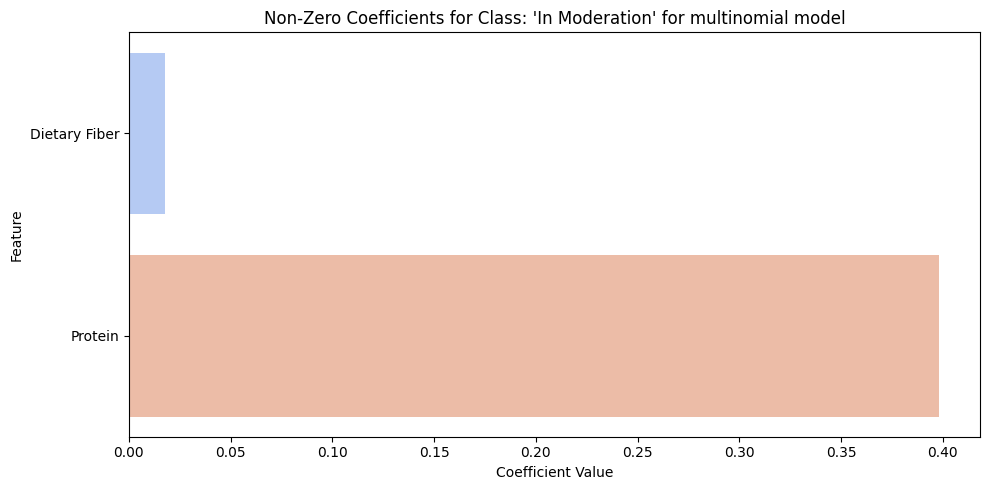

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


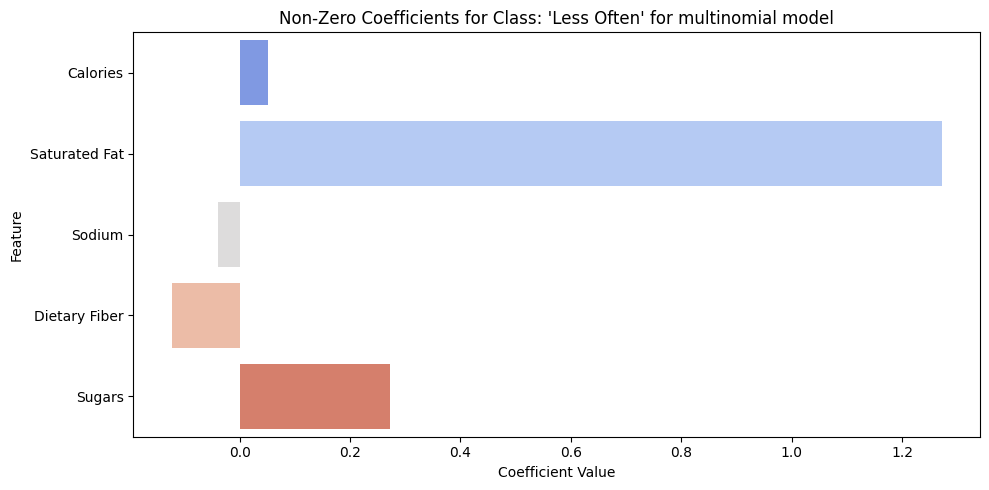

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


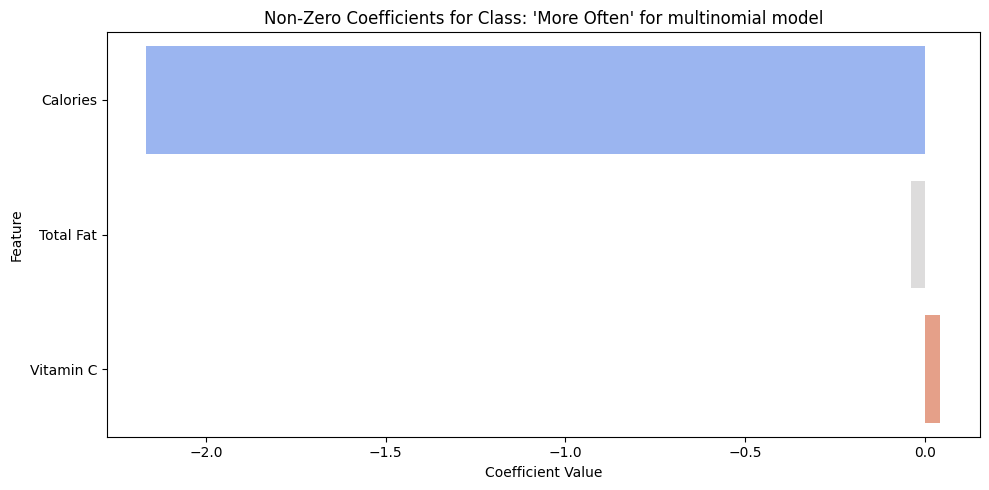

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


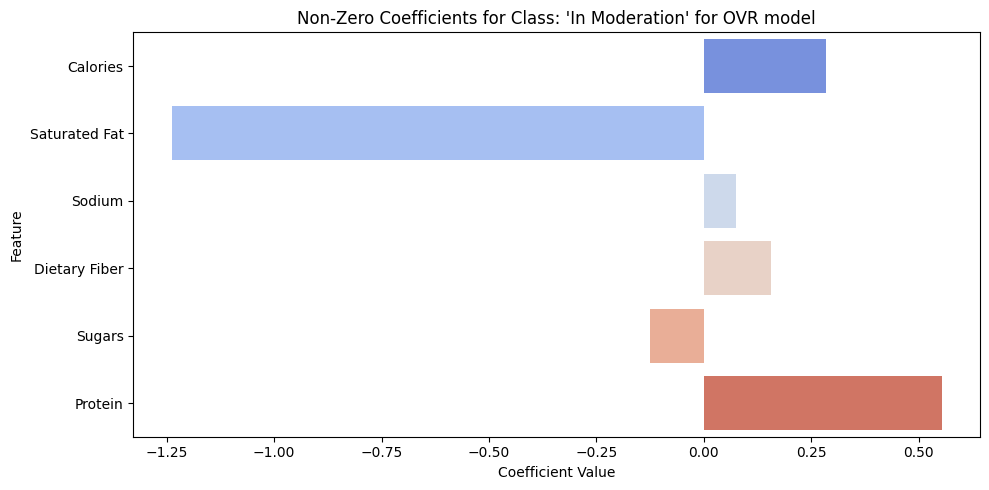

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


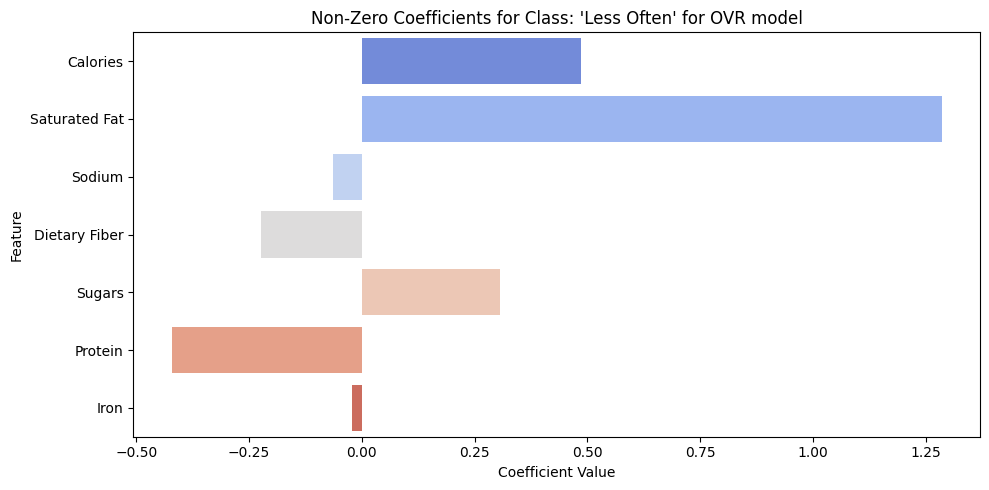

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


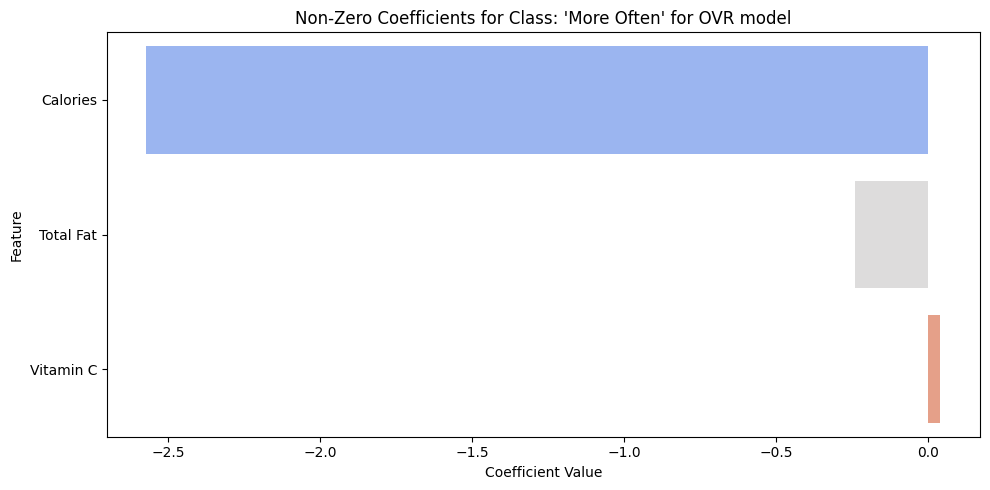

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


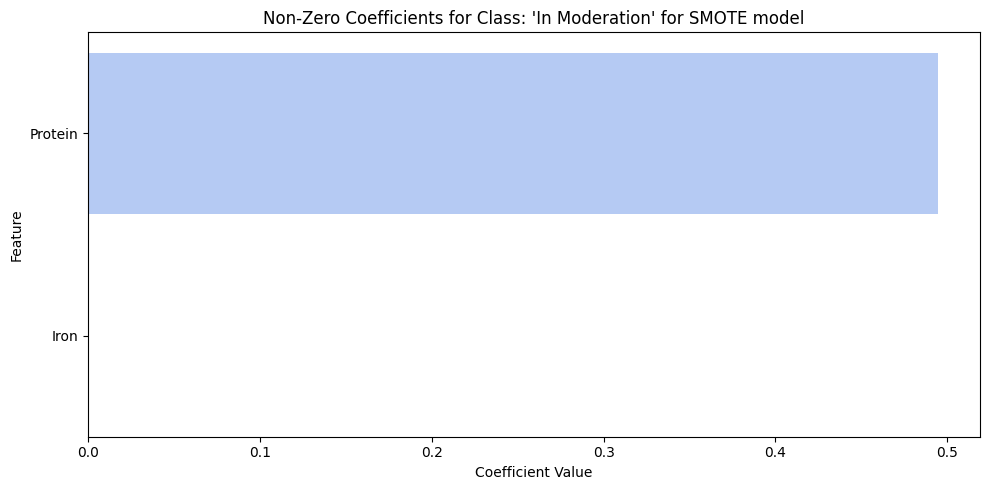

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


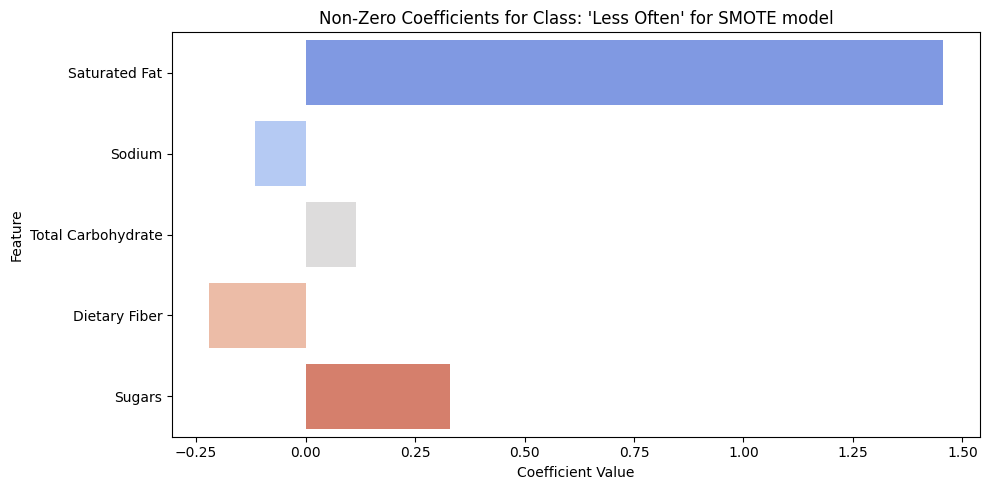

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


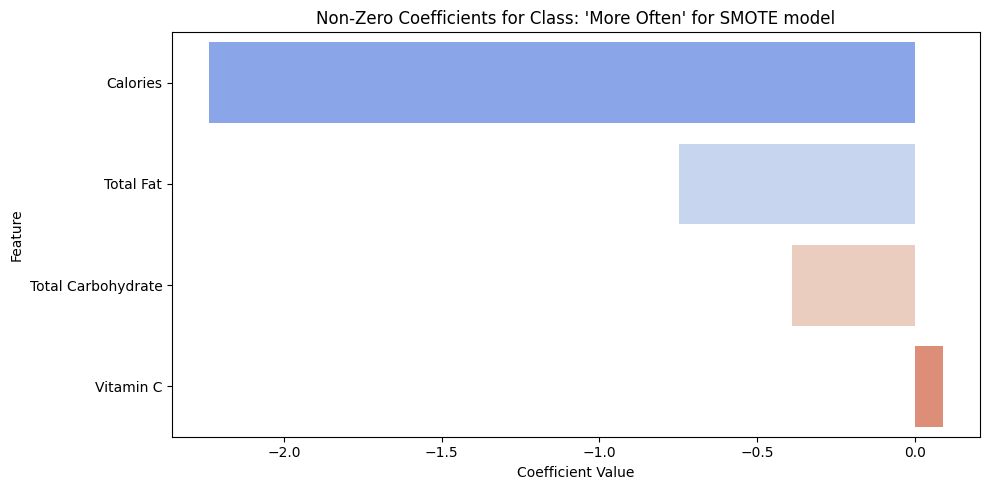

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


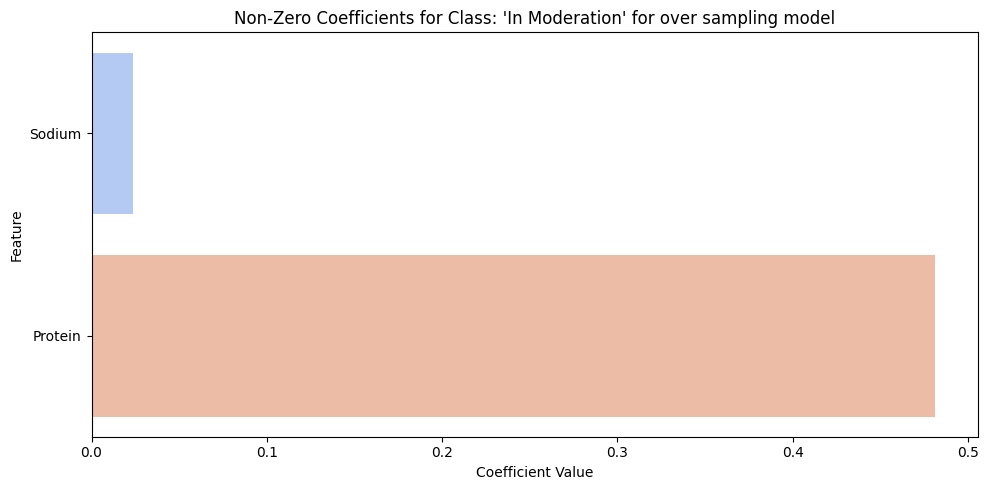

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


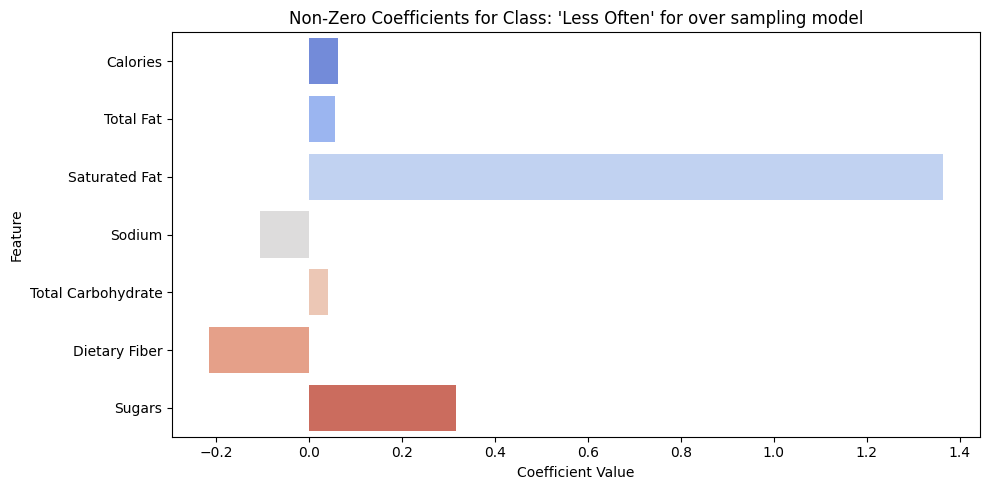

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


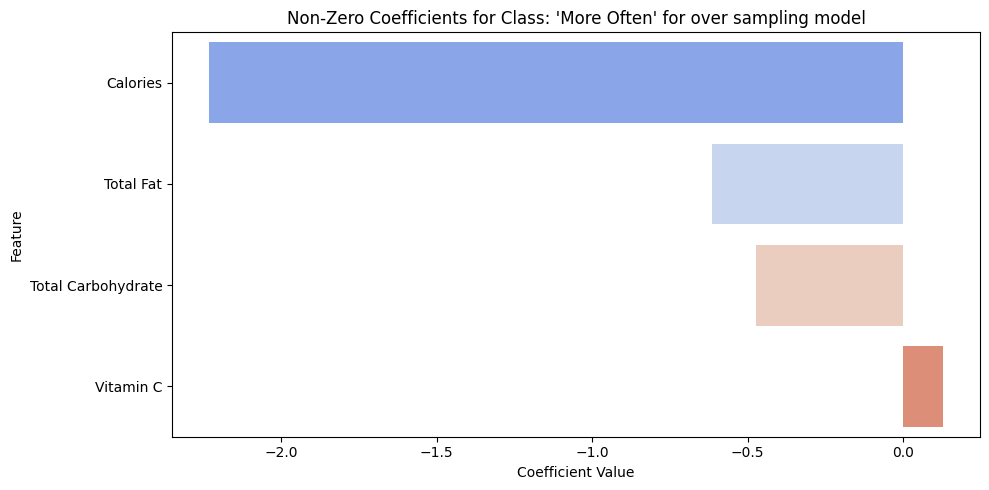

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


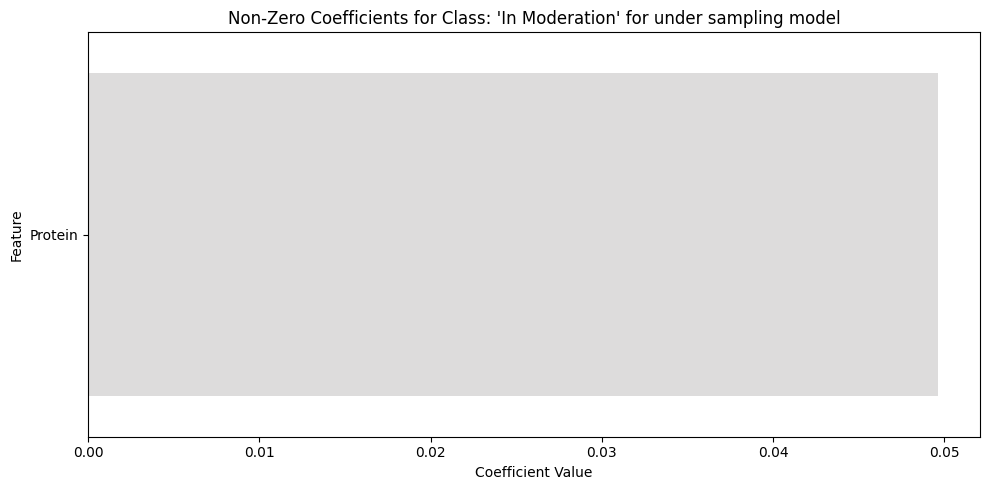

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


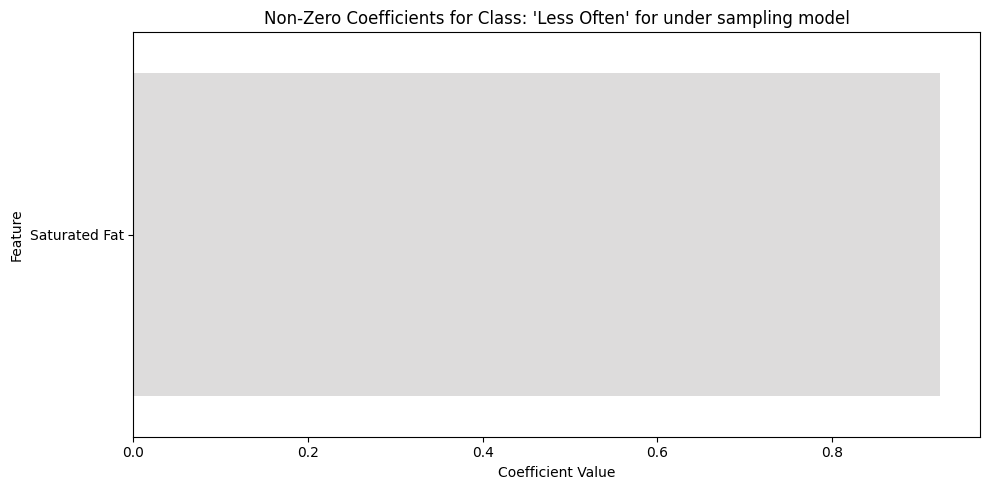

C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\2733580121.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')


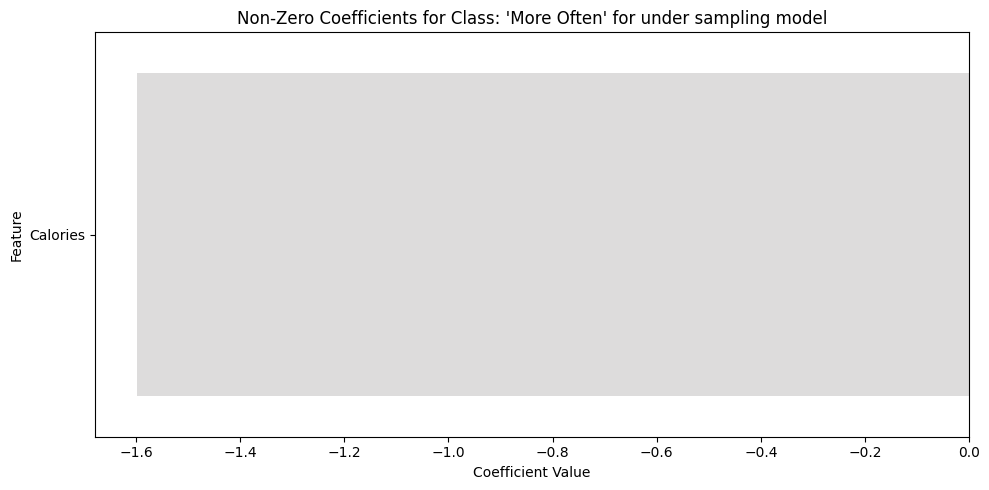

In [80]:
#class labels (e.g., 'In Moderation', 'Less Often', 'More Often')
class_labels = le.classes_

# loop over each class
for name,model in models_models_names:
    for i, class_label in enumerate(class_labels):
        coef_i = model.coef_[i]
        nonzero_mask = coef_i != 0
        selected_features = feature_names[nonzero_mask]
        selected_coefs = coef_i[nonzero_mask]

        plt.figure(figsize=(10, 5))
        sns.barplot(x=selected_coefs, y=selected_features, palette='coolwarm')
        plt.title(f"Non-Zero Coefficients for Class: {class_label} for {name} model")
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

In [96]:
all_models_names=["lr_multinomial","lr_ovr","lr_smote","lr_oversamp","lr_undersamp","lr_multinomial_l2","lr_ovr_l2","lr_smote_l2","lr_oversamp_l2","lr_undersamp_l2","lr_multinomial_l1","lr_ovr_l1","lr_smote_l1","lr_oversamp_l1","lr_undersamp_l1"]
all_models=[clf,ovr,clf1,clf2,clf3,l2_model,l2_model_ovr,l2_model1,l2_model2,l2_model3,l1_model,l1_model_ovr,l1_model1,l1_model2,l1_model3]
NAMES_MODELS=list(zip(all_models_names,all_models))

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for name, model in NAMES_MODELS:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC AUC": roc_auc_score(y_test, y_proba, average='macro', multi_class='ovr')
    })


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

In [99]:
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df = results_df.sort_values(by="F1 Score", ascending=False)

display(results_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
lr_undersamp_l1,0.661568,0.598203,0.661568,0.628254,0.860520
lr_multinomial_l1,0.629063,0.571829,0.629063,0.597972,0.897969
lr_ovr_l1,0.618547,0.563173,0.618547,0.588222,0.901425
lr_multinomial_l2,0.612811,0.554413,0.612811,0.582146,0.902839
lr_oversamp_l1,0.615679,0.555559,0.615679,0.579720,0.885594
lr_smote_l1,0.600382,0.550773,0.600382,0.547704,0.886988
lr_undersamp_l2,0.609943,0.608995,0.609943,0.528990,0.883591
lr_undersamp,0.553537,0.523714,0.553537,0.521027,0.886121
lr_ovr,0.569790,0.511713,0.569790,0.518558,0.907091


L1 Regularization (_l1) improved accuracy, F1-score, and precision in most cases.

L2 Regularization (_l2) slightly improved ROC AUC, meaning better probability calibration/generalization, but less improvement in F1-score.

Regularization controls overfitting especially L1.

Balancing techniques boosted classification performance, especially when combined with regularization.

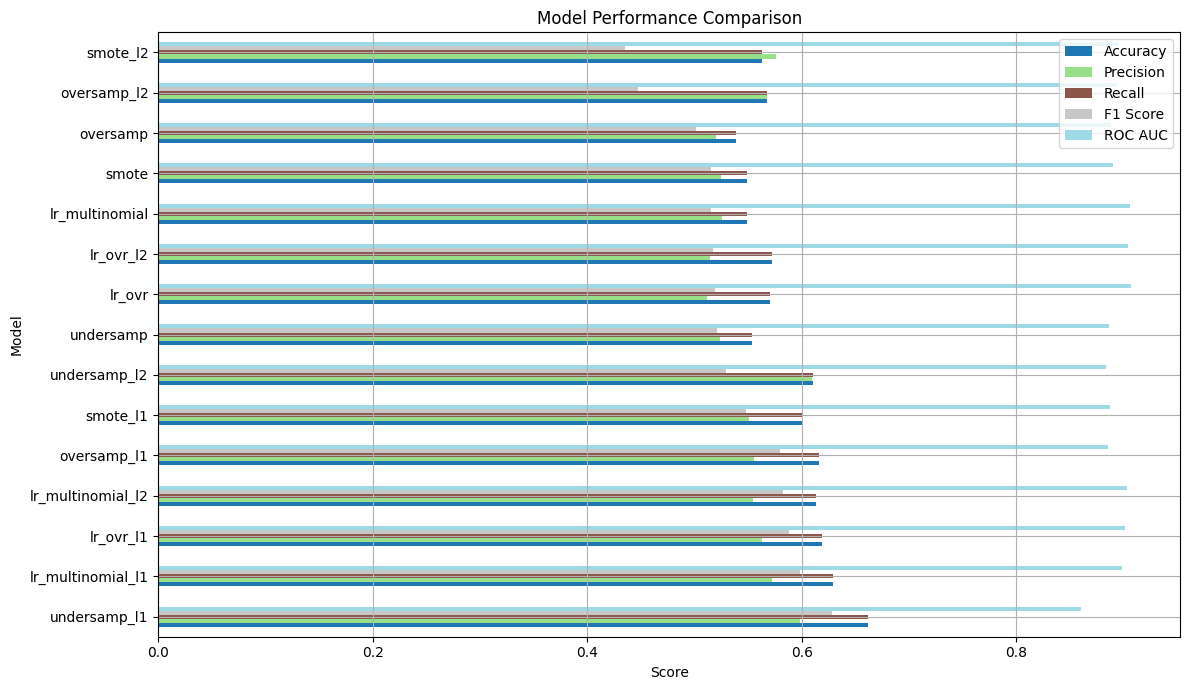

In [85]:
import matplotlib.pyplot as plt

results_df.plot(kind='barh', figsize=(12, 7), colormap='tab20')
plt.title("Model Performance Comparison")
plt.xlabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


## regularization 
affecting **performance**: Strong regularization likely reduced model variance. This may slightly reduce training accuracy but improve test/generalization performance.

 affecting **generalization**: Helps prevent overfitting on noisy or irrelevant features by shrinking their weights.


## balancing 
is too important because logistic regression  can be biased toward majority classes

every method has **advantages** and **disadvantages**

**SMOTE**: no info loss but can create inaccurate data

**over sampling**: may overfit on minority

**under sampling**: reduces training time but may cause underfit